In [1]:
# 1. separate trajectory with shortcuts and without shortcuts
import pandas as pd

df = pd.read_csv('df_standard1.csv')
df = df[[#'Unnamed: 0.1', 'Unnamed: 0', 
    'DateTime', 'posX', 'posZ', 'taskState',
       'mapInteractions', 'participant', 'scenario', #'start_point', 'phase', 
       'routename', #'taskId', 
       'trajectory_Id', #'distance_to_end',
       ]].copy()

print(df)

                       DateTime       posX       posZ  \
0       2023-09-21 16:44:31.485 -1260.3060  -908.9736   
1       2023-09-21 16:44:31.486 -1260.3060  -908.9736   
2       2023-09-21 16:44:31.507 -1260.3060  -908.9736   
3       2023-09-21 16:44:31.535 -1260.3060  -908.9736   
4       2023-09-21 16:44:31.561 -1260.3060  -908.9736   
...                         ...        ...        ...   
159732  2023-10-31 17:18:32.424  -179.5644 -1039.5030   
159733  2023-10-31 17:18:32.811  -179.5652 -1039.5060   
159734  2023-10-31 17:18:33.355  -179.5652 -1039.5060   
159735  2023-10-31 17:18:33.907  -179.5652 -1039.5060   
159736  2023-10-31 17:18:33.907  -179.5652 -1039.5060   

                       taskState  \
0       setNavigationTarget:Coop   
1                            NaN   
2                            NaN   
3                            NaN   
4                            NaN   
...                          ...   
159732                       NaN   
159733                     

In [2]:
# 1.1 create the building block data

from shapely.geometry import Polygon
# Define building block coordinates
building_block_coordinates = [
    [(-1220, -666), (-1181, -666), (-1181, -900),  (-1220, -900)],  # Coordinates for building block 1
    [(-1220, -970), (-1181, -970), (-1181, -1066), (-1082, -1066), (-1082, -1100), (-1182, -1100),(-1182, -1200), (-1219, -1201)],
    [(-1119.3, -569.1), (-1078, -569.1), (-1078, -741.8),  (-1115.7, -741.8)],  
    [(-1017.5, -563.5), (-986.6, -563.5), (-986.6, -750),  (-1017.1, -750)],
    [(-1113.1, -818.5), (-1084.3, -818.5), (-1084.3, -996.2),  (-1117.7, -996.2)],
    [(-1017, -812.7), (-983.4, -812.7), (-983.4, -999.4),  (-1017, -999.4)],
    [(-913.8, -673.7), (-882.1, -673.7), (-882.1, -769.3), (-784.7, -769.3), (-784.7, -801.5), (-882.1, -801.5),(-882.1, -898.7), (-913.8, -898.7)],
    [(-916, -965.6), (-884.4, -965.6), (-884.4, -1062), (-783.6, -1062), (-783.6, -1098.6), (-1014.9, -1098.6),(-1014.9, -1062.5), (-916, -1062.5)],
    
    [(-715.2, -1065.9), (-486.4, -1065.9), (-486.4, -1097.6), (-579.9, -1097.6), (-579.9, -1199), (-615.6, -1199),(-615.6, -1097.6), (-715.2, -1097.6)],
    [(-310.1, -969.7), (-285, -969.7), (-285, -1066.7), (-183.1, -1066.7), (-183.1, -1094.8), (-417.2, -1094.8),(-417.2, -1065.9), (-310.1, -1065.9)],
    [(-315.7, -665.2), (-285.3, -665.2), (-285.3, -897.1), (-315.7,-897.1 ), (-315.7, -799.4), (-416.9, -799.4),(-416.9,-764 ), (-315.7, -764)],
    # [(, ), (, ), (, ), (, ), (, ), (, ),(, ), (, )],
    [(-817.5, -565.7), (-631.5, -565.7), (-673.4, -601),  (-817.5, -601)],
    [(-562.1, -563.4), (-386.9, -563.4), (-386.9, -599.2),  (-527.9, -599.2)],
    [(-527.9, -664.3), (-383.1, -664.3), (-383.1, -697.9),  (-563.2, -697.9)], 
    [(-816.2, -666.6), (-674.8, -666.6 ), (-639.8, -698.9),  (-816.2, -698.9)], 

    [(-715.1, -767.5), (-484.8, -767.5), (-484.8, -802),  (-715.1, -802)], 

    [(-822, -865.3), (-630.7, -865.3), (-630.7, -891.2),  (-822, -891.2)], 
    [(-564.5, -868.7), (-381.3, -868.7), (-381.3, -890.7),  (-564.5, -890.7)], 
    [(-822, -975.5), (-633.3, -975.5), (-633.3, -1001.3),  (-822, -1001.3)], 
    [(-566.9, -977.7), (-377.8,-977.7 ), (-377.8, -996.8),  (-566.9, -996.5)], 

    [(-218.1, -766.5), (-179.8, -766.5), (-179.8, -799.9),  (-218.1, -799.9)], 
    [(-116.9, -764.1), (-81.1, -764.1), (-81.1, -797.4),  (-116.9, -797.4)], 
    [(-214.9, -868 ), (-181.9, -868), (-181.9, -999.8),  (-214.9, -999.8)], 
    [(-114.6, -868.8), (-81.7, -868.8), (-81.7, -999.3),  (-114.6, -999.3)], 
    # [(, ), (, ), (, ),  (, )], 
    
]

# List to store building block polygons
building_block_polygons = []

# Iterate over building block coordinates to create polygons
for coords in building_block_coordinates:
    polygon = Polygon(coords)
    building_block_polygons.append(polygon)

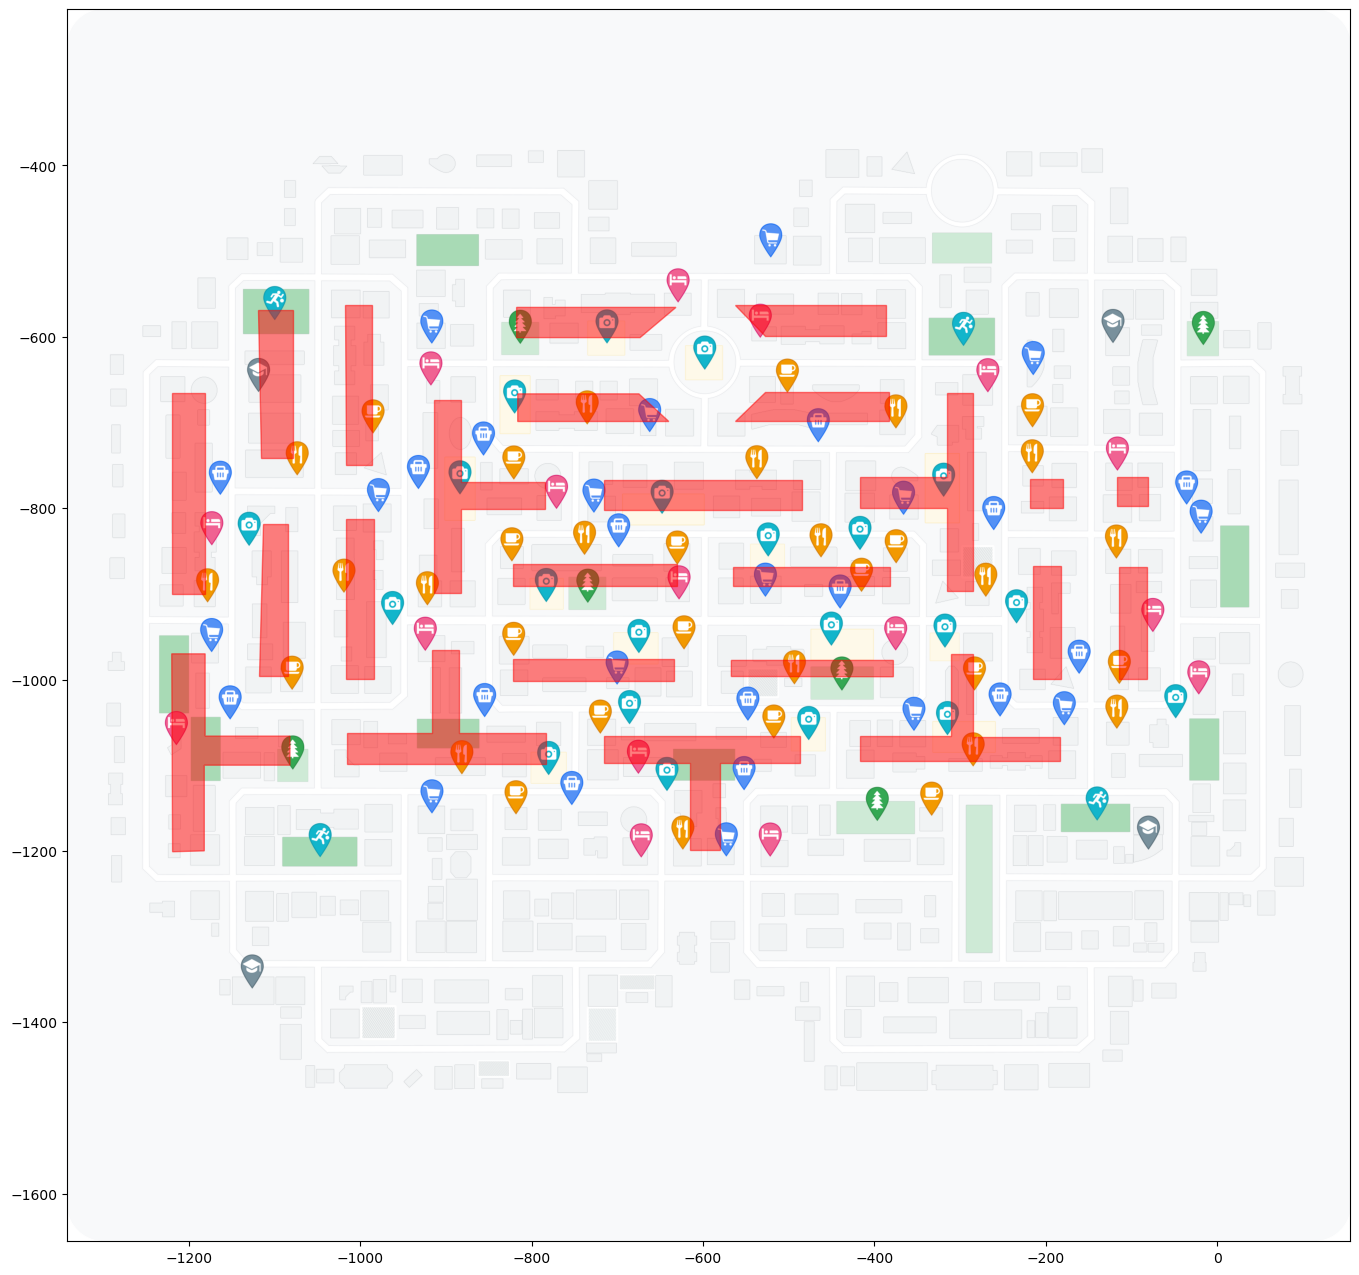

In [3]:
# 1.2 plot building blocks
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import matplotlib.image as mpimg
import numpy as np

# Load the map image
img_path = 'map_vector_v3_icons.png'
img = mpimg.imread(img_path)
img_height, img_width, _ = img.shape

# Set map coordinates and plot dimensions
center_x, center_z = -593.7, -936.7
bottom_left_x, bottom_left_z = -1342.4, -1655.6
dist_to_left = center_x - bottom_left_x
dist_to_top = center_z - bottom_left_z

# Generate x and y coordinates for the map image
x = np.linspace(center_x - dist_to_left, center_x + dist_to_left, img_width)
y = np.linspace(center_z - dist_to_top, center_z + dist_to_top, img_height)
X, Y = np.meshgrid(x, y)

# Create the plot with the map image
plt.figure(figsize=(20, 16))
plt.imshow(img, extent=[x[0], x[-1], y[0], y[-1]])

# Plot building block polygons
for polygon in building_block_polygons:
    x, y = polygon.exterior.xy
    plt.fill(x, y, color='red', alpha=0.5)  # Adjust color and transparency as needed

plt.show()


In [5]:
# 1.3 detect specific trajectory:
import pandas as pd
from shapely.geometry import Point, LineString, Polygon

# Load trajectory dataset
trajectory_data = df.copy()

# Load building block dataset
building_blocks = building_block_polygons

# Function to check for intersection between trajectory line and building blocks
def check_for_shortcuts(trajectory_line, building_blocks):
    for building in building_blocks:
        if trajectory_line.intersects(building):
            return True
    return False

# Iterate over each trajectory
for trajectory_id, trajectory_group in trajectory_data.groupby('trajectory_Id'):
    # Convert trajectory points to LineString
    trajectory_line = LineString(trajectory_group[['posX', 'posZ']].values)
    
    # Check for intersections with building blocks
    if check_for_shortcuts(trajectory_line, building_blocks):
        print(f"Trajectory {trajectory_id} involves a shortcut through buildings.")

Trajectory 26 involves a shortcut through buildings.
Trajectory 27 involves a shortcut through buildings.
Trajectory 41 involves a shortcut through buildings.
Trajectory 72 involves a shortcut through buildings.
Trajectory 74 involves a shortcut through buildings.
Trajectory 76 involves a shortcut through buildings.
Trajectory 79 involves a shortcut through buildings.
Trajectory 88 involves a shortcut through buildings.
Trajectory 90 involves a shortcut through buildings.
Trajectory 94 involves a shortcut through buildings.
Trajectory 95 involves a shortcut through buildings.
Trajectory 96 involves a shortcut through buildings.
Trajectory 103 involves a shortcut through buildings.
Trajectory 106 involves a shortcut through buildings.
Trajectory 108 involves a shortcut through buildings.
Trajectory 119 involves a shortcut through buildings.
Trajectory 120 involves a shortcut through buildings.
Trajectory 122 involves a shortcut through buildings.
Trajectory 123 involves a shortcut throu

In [6]:
# 1.4 separate the dataset 

# Lists to store trajectory IDs
shortcuts_trajectory_ids = []
no_shortcuts_trajectory_ids = []

# Iterate over each trajectory
for trajectory_id, trajectory_group in trajectory_data.groupby('trajectory_Id'):
    # Convert trajectory points to LineString
    trajectory_line = LineString(trajectory_group[['posX', 'posZ']].values)
    
    # Check for intersections with building blocks
    if check_for_shortcuts(trajectory_line, building_blocks):
        shortcuts_trajectory_ids.append(trajectory_id)
    else:
        no_shortcuts_trajectory_ids.append(trajectory_id)

# Now you have two lists: shortcuts_trajectory_ids and no_shortcuts_trajectory_ids
# You can use these lists to filter your original dataset accordingly
shortcuts_trajectories = trajectory_data[trajectory_data['trajectory_Id'].isin(shortcuts_trajectory_ids)]
no_shortcuts_trajectories = trajectory_data[trajectory_data['trajectory_Id'].isin(no_shortcuts_trajectory_ids)]

# Print the counts of trajectories with and without shortcuts
print(f"Trajectories with shortcuts: {len(shortcuts_trajectory_ids)}")
print(f"Trajectories without shortcuts: {len(no_shortcuts_trajectory_ids)}")

shortcuts_trajectories.to_csv('df_shortcuts.csv')
no_shortcuts_trajectories.to_csv('df_noshortcuts.csv')

Trajectories with shortcuts: 163
Trajectories without shortcuts: 700


In [2]:
import pandas as pd
df = pd.read_csv('df_noshortcuts.csv')
truee = (df['mapInteractions'] == 'mapLog:isScreenLocked+True').sum()
falsee = (df['mapInteractions'] == 'mapLog:isScreenLocked+False').sum()

print(truee)
print(falsee)

2405
1901


-------------------- Align trajectory 

In [33]:
# 2. create road network 3
from shapely.geometry import Point, LineString

# Define road network using nodes and edges (graph representation)
nodes = {
    'v11': Point(-1250, -632),    # E1
    'v12': Point(-1250, -932),
    'v13': Point(-1250, -1232),

    'v21': Point(-1150, -532),  # E1
    'v22': Point(-1150, -632),
    'v23': Point(-1150, -782),
    'v24': Point(-1150, -932),
    'v25': Point(-1150, -1032),
    'v26': Point(-1150, -1132),
    'v27': Point(-1150, -1232),

    'v31': Point(-1050, -532),
    'v32': Point(-1050, -782),
    'v33': Point(-1050, -1032),
    'v34': Point(-1050, -1132),

    'v41': Point(-950, -532),
    'v42': Point(-950, -632),
    'v43': Point(-950, -782),
    'v44': Point(-950, -932),
    'v45': Point(-950, -1032),
    'v46': Point(-950, -1132),
    'v47': Point(-950, -1232),

    'v51': Point(-850, -532),
    'v52': Point(-850, -632),
    'v53': Point(-850, -732),
    'v54': Point(-850, -832),
    'v55': Point(-850, -932),
    'v56': Point(-850, -1032),
    'v57': Point(-850, -1132),
    'v58': Point(-850, -1232),

    'v61': Point(-750, -532),
    'v62': Point(-750, -732),
    'v63': Point(-750, -832),
    'v64': Point(-750, -1032),
    'v65': Point(-750, -1132),

    'v71': Point(-650, -1132),
    'v72': Point(-650, -1232),

    'v81': Point(-600, -532), #symmetric 
    'v82': Point(-600, -592),
    'v83': Point(-600, -672),
    'v84': Point(-600, -732),
    'v85': Point(-600, -832),
    'v86': Point(-600, -932),
    'v87': Point(-600, -1032),

    'v-71': Point(-550, -1132),
    'v-72': Point(-550, -1232),

    'v-61': Point(-450, -532),
    'v-62': Point(-450, -732),
    'v-63': Point(-450, -832),
    'v-64': Point(-450, -1032),
    'v-65': Point(-450, -1132),

    'v-51': Point(-350, -532),
    'v-52': Point(-350, -632),
    'v-53': Point(-350, -732),
    'v-54': Point(-350, -832),
    'v-55': Point(-350, -932),
    'v-56': Point(-350, -1032),
    'v-57': Point(-308, -1132),
    'v-58': Point(-308, -1232),

    'v-41': Point(-250, -532),
    'v-42': Point(-250, -632),
    'v-43': Point(-250, -732),
    'v-44': Point(-250, -832),
    'v-45': Point(-250, -932),
    'v-46': Point(-250, -1032),
    'v-47': Point(-250, -1132),
    'v-48': Point(-250, -1232),
    
    'v-31': Point(-150, -532),
    'v-32': Point(-150, -732),
    'v-33': Point(-150, -832),
    'v-34': Point(-150, -1032),
    'v-35': Point(-150, -1132),


    'v-21': Point(-50, -532),  # E1
    'v-22': Point(-50, -632),
    'v-23': Point(-50, -732),
    'v-24': Point(-50, -832),
    'v-25': Point(-50, -932),
    'v-26': Point(-50, -1032),
    'v-27': Point(-50, -1132),
    'v-28': Point(-50, -1232),

    'v-11': Point(50, -632),    # E1
    'v-12': Point(50, -932),
    'v-13': Point(50, -1232),

    # circle
    'c11': Point(-642, -632),    
    'c12': Point(-558, -632),


}

#Define road segments as LineString objects between nodes
road_segments = {'v11' :LineString([nodes['v11'], nodes['v12']]),
                 'v12' :LineString([nodes['v12'], nodes['v13']]),
                 
                 
                 'v21' :LineString([nodes['v21'], nodes['v22']]),
                 'v22' :LineString([nodes['v22'], nodes['v23']]),
                 'v23' :LineString([nodes['v23'], nodes['v24']]),
                 'v24' :LineString([nodes['v24'], nodes['v25']]),
                 'v25' :LineString([nodes['v26'], nodes['v27']]),

                 'v31' :LineString([nodes['v31'], nodes['v32']]),
                 'v32' :LineString([nodes['v32'], nodes['v33']]),
                 'v33' :LineString([nodes['v33'], nodes['v34']]),

                 'v41' :LineString([nodes['v41'], nodes['v42']]),
                 'v42' :LineString([nodes['v42'], nodes['v43']]),
                 'v43' :LineString([nodes['v43'], nodes['v44']]),
                 'v44' :LineString([nodes['v44'], nodes['v45']]),
                 'v45' :LineString([nodes['v46'], nodes['v47']]),

                 'v51' :LineString([nodes['v51'], nodes['v52']]),
                 'v52' :LineString([nodes['v52'], nodes['v53']]),
                 'v53' :LineString([nodes['v54'], nodes['v55']]),
                 'v54' :LineString([nodes['v55'], nodes['v56']]),
                 'v55' :LineString([nodes['v57'], nodes['v58']]),

                 'v61' :LineString([nodes['v62'], nodes['v63']]),
                 'v62' :LineString([nodes['v64'], nodes['v65']]),

                 'v71' :LineString([nodes['v71'], nodes['v72']]),

                 'v81' :LineString([nodes['v81'], nodes['v82']]),
                 'v82' :LineString([nodes['v83'], nodes['v84']]),
                 'v83' :LineString([nodes['v85'], nodes['v86']]),
                 'v84' :LineString([nodes['v86'], nodes['v87']]),

                 'v-11' :LineString([nodes['v-11'], nodes['v-12']]),
                 'v-12' :LineString([nodes['v-12'], nodes['v-13']]),

                 'v-21' :LineString([nodes['v-21'], nodes['v-22']]),
                 'v-22' :LineString([nodes['v-22'], nodes['v-23']]),
                 'v-23' :LineString([nodes['v-23'], nodes['v-24']]),
                 'v-24' :LineString([nodes['v-24'], nodes['v-25']]),
                 'v-25' :LineString([nodes['v-25'], nodes['v-26']]),
                 'v-26' :LineString([nodes['v-27'], nodes['v-28']]),

                 'v-31' :LineString([nodes['v-31'], nodes['v-32']]),
                 'v-32' :LineString([nodes['v-32'], nodes['v-33']]),
                 'v-33' :LineString([nodes['v-33'], nodes['v-34']]),
                 'v-34' :LineString([nodes['v-34'], nodes['v-35']]),

                 'v-41' :LineString([nodes['v-41'], nodes['v-42']]),
                 'v-42' :LineString([nodes['v-42'], nodes['v-43']]),
                 'v-43' :LineString([nodes['v-43'], nodes['v-44']]),
                 'v-44' :LineString([nodes['v-44'], nodes['v-45']]),
                 'v-45' :LineString([nodes['v-45'], nodes['v-46']]),
                 'v-46' :LineString([nodes['v-47'], nodes['v-48']]),


                 'v-51' :LineString([nodes['v-51'], nodes['v-52']]),
                 'v-52' :LineString([nodes['v-52'], nodes['v-53']]),
                 'v-53' :LineString([nodes['v-54'], nodes['v-55']]),
                 'v-54' :LineString([nodes['v-55'], nodes['v-56']]),
                 'v-55' :LineString([nodes['v-57'], nodes['v-58']]),

                 'v-61' :LineString([nodes['v-62'], nodes['v-63']]),
                 'v-62' :LineString([nodes['v-64'], nodes['v-65']]),

                 'v-71' :LineString([nodes['v-71'], nodes['v-72']]),


                #  'v-11' :LineString([nodes['v-11'], nodes['v-13']]),
                #  'v-21' :LineString([nodes['v-21'], nodes['v-25']]),
                #  'v-22' :LineString([nodes['v-26'], nodes['v-27']]),
                #  'v-31' :LineString([nodes['v-31'], nodes['v-34']]),
                #  'v-41' :LineString([nodes['v-41'], nodes['v-45']]),
                #  'v-42' :LineString([nodes['v-46'], nodes['v-47']]),
                #  'v-51' :LineString([nodes['v-51'], nodes['v-53']]),
                #  'v-52' :LineString([nodes['v-54'], nodes['v-56']]),
                #  'v-53' :LineString([nodes['v-57'], nodes['v-58']]),
                #  'v-61' :LineString([nodes['v-62'], nodes['v-63']]),
                #  'v-62' :LineString([nodes['v-64'], nodes['v-65']]),
                #  'v-71' :LineString([nodes['v-71'], nodes['v-72']]),

                 #horizontal
                 'h11' : LineString([nodes['v21'], nodes['v31']]),
                 'h12' : LineString([nodes['v31'], nodes['v41']]),
                 'h13' : LineString([nodes['v51'], nodes['v81']]),
                 'h14' : LineString([nodes['v81'], nodes['v-51']]),
                 'h15' : LineString([nodes['v-41'], nodes['v-31']]),
                 'h16' : LineString([nodes['v-31'], nodes['v-21']]),

                 'h21' : LineString([nodes['v11'], nodes['v22']]),
                 'h22' : LineString([nodes['v42'], nodes['v52']]),
                 'h23' : LineString([nodes['v52'], nodes['c11']]),
                 'h24' : LineString([nodes['c12'], nodes['v-52']]),
                 'h25' : LineString([nodes['v-22'], nodes['v-11']]),    

                 'h31' : LineString([nodes['v53'], nodes['v62']]),
                 'h32' : LineString([nodes['v62'], nodes['v84']]),
                 'h33' : LineString([nodes['v84'], nodes['v-62']]),
                 'h34' : LineString([nodes['v-62'], nodes['v-53']]),
                 'h35' : LineString([nodes['v-43'], nodes['v-32']]),
                 'h36' : LineString([nodes['v-32'], nodes['v-23']]),

                 'h41' : LineString([nodes['v23'], nodes['v32']]),
                 'h42' : LineString([nodes['v32'], nodes['v43']]),

                 'h51' : LineString([nodes['v54'], nodes['v63']]),
                 'h52' : LineString([nodes['v63'], nodes['v85']]),
                 'h53' : LineString([nodes['v85'], nodes['v-63']]),
                 'h54' : LineString([nodes['v-63'], nodes['v-54']]),
                 'h55' : LineString([nodes['v-44'], nodes['v-33']]),
                 'h56' : LineString([nodes['v-33'], nodes['v-24']]),

                 'h61' : LineString([nodes['v12'], nodes['v24']]),
                 'h62' : LineString([nodes['v44'], nodes['v55']]),
                 'h63' : LineString([nodes['v55'], nodes['v86']]),
                 'h64' : LineString([nodes['v86'], nodes['v-55']]),
                 'h65' : LineString([nodes['v-55'], nodes['v-45']]),
                 'h66' : LineString([nodes['v-12'], nodes['v-25']]),

                 'h71' : LineString([nodes['v25'], nodes['v33']]),
                 'h72' : LineString([nodes['v33'], nodes['v45']]),
                 'h73' : LineString([nodes['v56'], nodes['v64']]),
                 'h74' : LineString([nodes['v64'], nodes['v87']]),
                 'h75' : LineString([nodes['v87'], nodes['v-64']]),
                 'h76' : LineString([nodes['v-64'], nodes['v-56']]),
                 'h77' : LineString([nodes['v-46'], nodes['v-34']]),
                 'h78' : LineString([nodes['v-34'], nodes['v-26']]),

                 'h81' : LineString([nodes['v26'], nodes['v34']]),
                 'h82' : LineString([nodes['v34'], nodes['v46']]),
                 'h83' : LineString([nodes['v46'], nodes['v57']]),
                 'h84' : LineString([nodes['v57'], nodes['v65']]),
                 'h85' : LineString([nodes['v65'], nodes['v71']]),
                 'h86' : LineString([nodes['v-65'], nodes['v-71']]),
                 'h87' : LineString([nodes['v-65'], nodes['v-57']]),
                 'h88' : LineString([nodes['v-57'], nodes['v-47']]),
                 'h89' : LineString([nodes['v-47'], nodes['v-35']]),
                 'h810' : LineString([nodes['v-35'], nodes['v-27']]),

                 'h91' : LineString([nodes['v13'], nodes['v27']]),
                 'h92' : LineString([nodes['v27'], nodes['v47']]),
                 'h93' : LineString([nodes['v58'], nodes['v72']]),
                 'h94' : LineString([nodes['v72'], nodes['v-72']]),
                 'h95' : LineString([nodes['v-72'], nodes['v-58']]),
                 'h96' : LineString([nodes['v-48'], nodes['v-28']]),
                 'h97' : LineString([nodes['v-28'], nodes['v-13']]),

                 #circle
                 'c1' : LineString([nodes['c11'], nodes['v82']]),
                 'c2' : LineString([nodes['c12'], nodes['v82']]),
                 'c3' : LineString([nodes['c12'], nodes['v83']]),
                 'c4' : LineString([nodes['c11'], nodes['v83']]),
             }

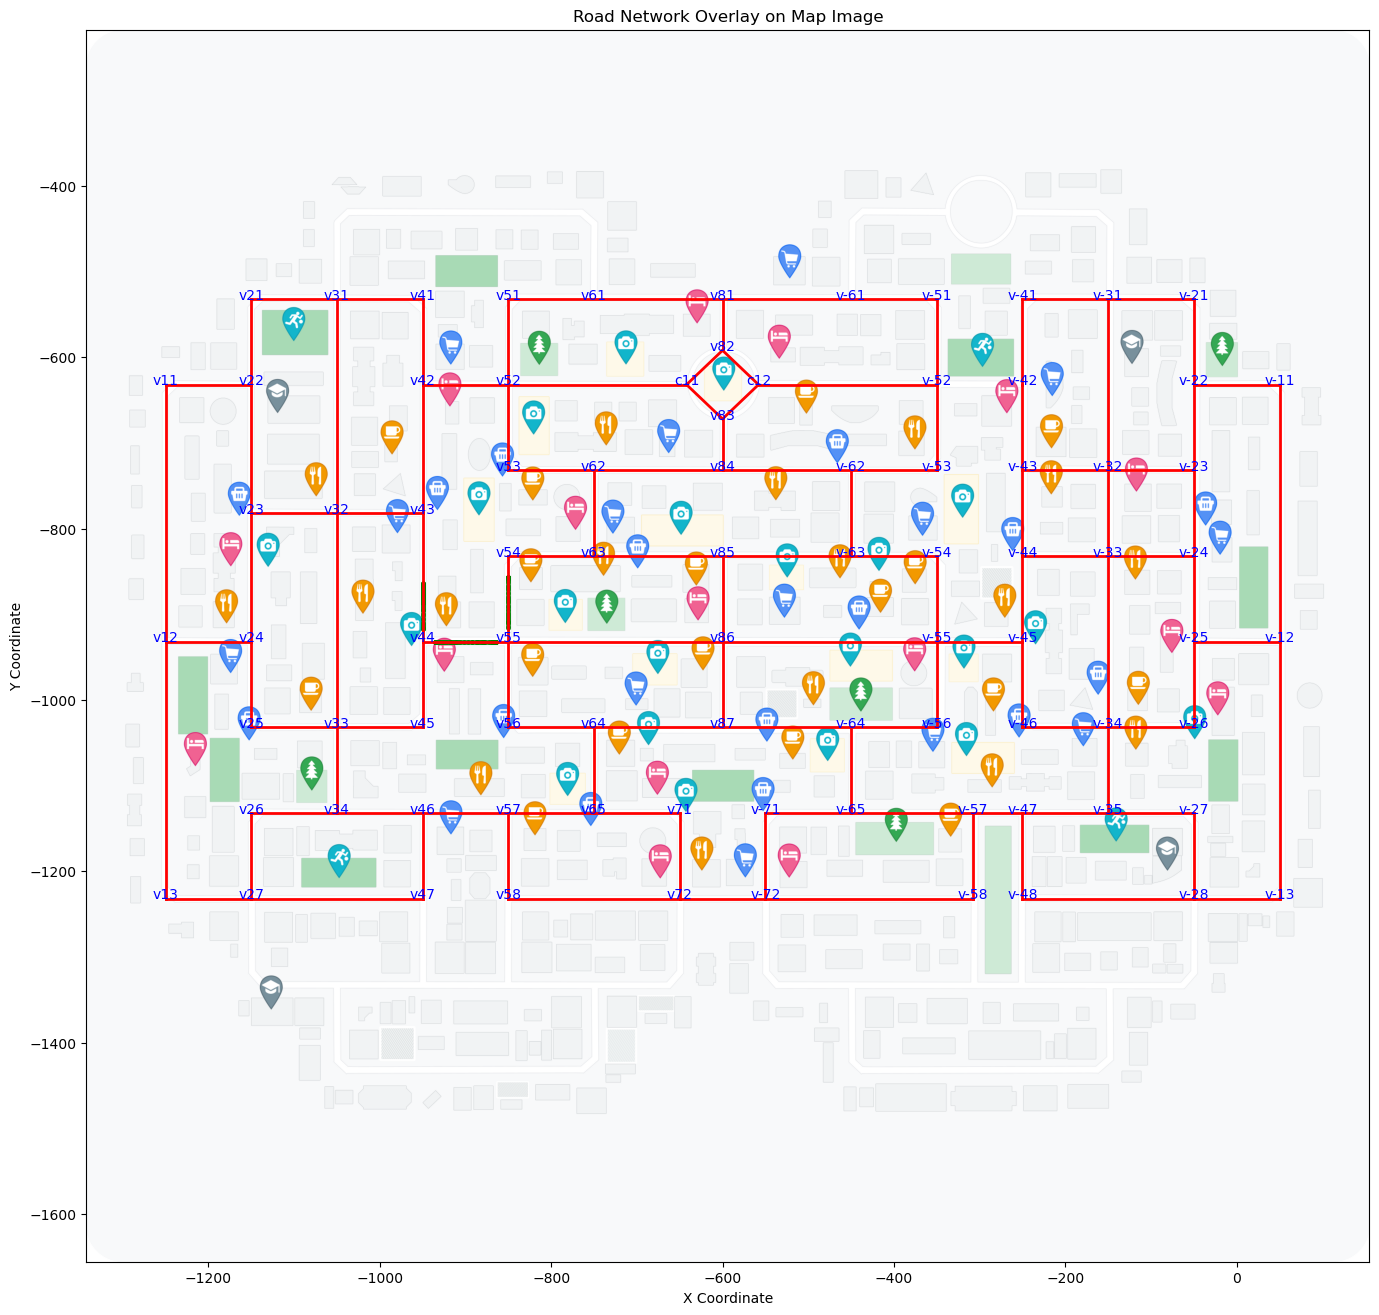

In [36]:
# 2.1 plot segments 3  on base map
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from shapely.geometry import Point, LineString

# Load the map image
img_path = 'map_vector_v3_icons.png'
img = mpimg.imread(img_path)
img_height, img_width, _ = img.shape

# Set map coordinates and plot dimensions
center_x, center_z = -593.7, -936.7
bottom_left_x, bottom_left_z = -1342.4, -1655.6
dist_to_left = center_x - bottom_left_x
dist_to_top = center_z - bottom_left_z

# Generate x and y coordinates for the map image
x = np.linspace(center_x - dist_to_left, center_x + dist_to_left, img_width)
y = np.linspace(center_z - dist_to_top, center_z + dist_to_top, img_height)
X, Y = np.meshgrid(x, y)

# Create the plot with the map image
plt.figure(figsize=(20, 16))
plt.imshow(img, extent=[x[0], x[-1], y[0], y[-1]])

# nodes and segments

for segment_id, road_segment in road_segments.items():
    # Extract x and y coordinates from LineString
    x_coords, y_coords = road_segment.xy
    
    # Plot LineString on the map image plot
    plt.plot(x_coords, y_coords, 'r-', linewidth=2)  # 'r-' for red lines

for node_name, node_point in nodes.items():
    plt.text(node_point.x, node_point.y, node_name, fontsize=10, color='blue', ha='center')


# Set plot title and axis labels
plt.title('Road Network Overlay on Map Image')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

# Show the plot
plt.show()


In [45]:
# 2.2 align a specific trajectory 
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# road_segments

# Load trajectory dataset
trajectory_data = pd.read_csv("df_noshortcuts.csv")

# Filter trajectory data for trajectory_Id == 2
trajectory_2 = trajectory_data[trajectory_data["trajectory_Id"] == 7]


def find_nearest_segment(point, road_segments):
    nearest_distance = float('inf')
    nearest_segment = None
    
    for segment_id, road_segment in road_segments.items():
        distance = point.distance(road_segment)
        if distance < nearest_distance:
            nearest_distance = distance
            nearest_segment = road_segment
    
    return nearest_segment

# Example usage
snapped_trajectory = []

# Iterate through trajectory points and snap to nearest road segment
for idx, row in trajectory_2.iterrows():
    point = Point(row["posX"], row["posZ"])
    nearest_segment = find_nearest_segment(point, road_segments)
    nearest_point_on_segment = nearest_segment.interpolate(nearest_segment.project(point))
    snapped_trajectory.append(nearest_point_on_segment)

# Print the snapped trajectory points
for point in snapped_trajectory:
    print(point)


POINT (-644.223 -932)
POINT (-644.223 -932)
POINT (-644.2557 -932)
POINT (-644.3095 -932)
POINT (-645.1088 -932)
POINT (-646.6309 -932)
POINT (-647.1933 -932)
POINT (-647.1933 -932)
POINT (-647.1766 -932)
POINT (-646.4421 -932)
POINT (-645.2831 -932)
POINT (-644.1734 -932)
POINT (-643.0505 -932)
POINT (-641.9559 -932)
POINT (-640.832 -932)
POINT (-639.723 -932)
POINT (-638.5918 -932)
POINT (-637.4866 -932)
POINT (-636.4235 -932)
POINT (-635.3448 -932)
POINT (-634.2889 -932)
POINT (-633.2318 -932)
POINT (-632.1464 -932)
POINT (-631.0756 -932)
POINT (-630.3216 -932)
POINT (-630.0729 -932)
POINT (-629.2488 -932)
POINT (-628.4706 -932)
POINT (-627.7297 -932)
POINT (-626.9557 -932)
POINT (-625.8343 -932)
POINT (-624.5877 -932)
POINT (-623.9366 -932)
POINT (-623.8122 -932)
POINT (-623.2855 -932)
POINT (-621.7938 -932)
POINT (-620.3117 -932)
POINT (-618.7542 -932)
POINT (-617.2419 -932)
POINT (-615.7411 -932)
POINT (-615.0582 -932)
POINT (-614.2321 -932)
POINT (-600 -917.9601)
POINT (-600 -91

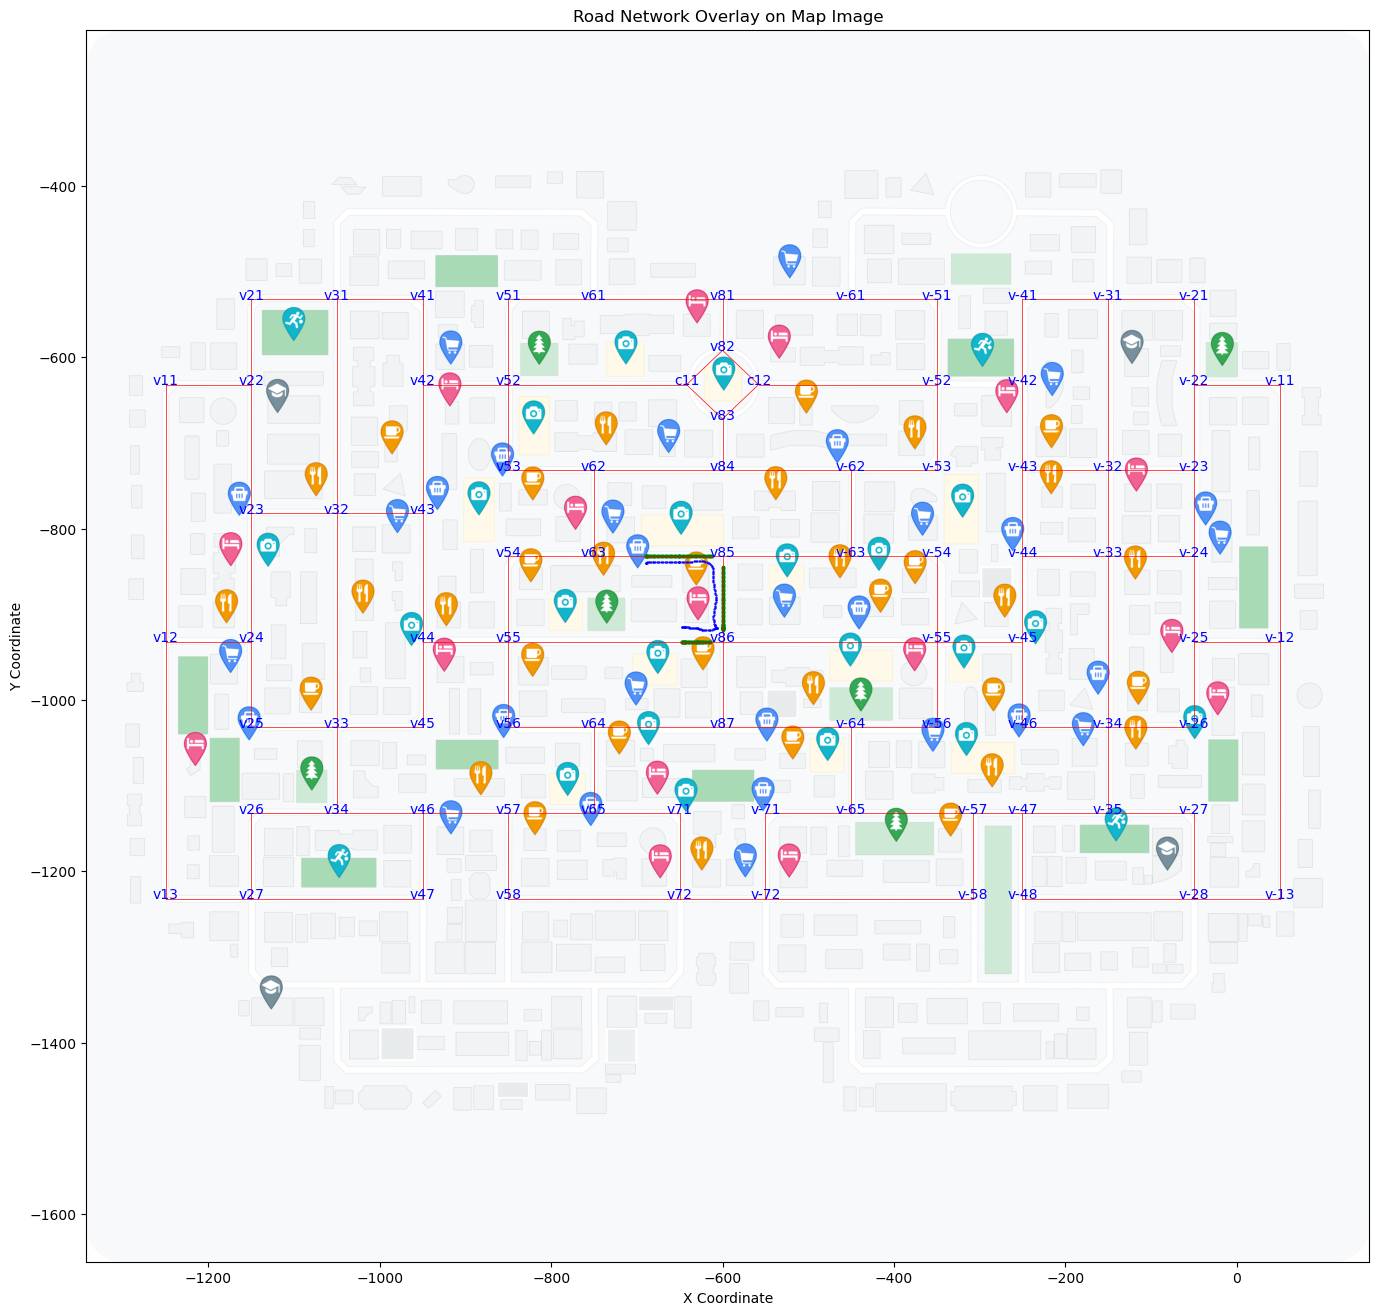

In [47]:
# 2.3 plot the specific snapped trajectory on base map.
# plot segments on base map
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from shapely.geometry import Point, LineString

# Load the map image
img_path = 'map_vector_v3_icons.png'
img = mpimg.imread(img_path)
img_height, img_width, _ = img.shape

# Set map coordinates and plot dimensions
center_x, center_z = -593.7, -936.7
bottom_left_x, bottom_left_z = -1342.4, -1655.6
dist_to_left = center_x - bottom_left_x
dist_to_top = center_z - bottom_left_z

# Generate x and y coordinates for the map image
x = np.linspace(center_x - dist_to_left, center_x + dist_to_left, img_width)
y = np.linspace(center_z - dist_to_top, center_z + dist_to_top, img_height)
X, Y = np.meshgrid(x, y)

# Create the plot with the map image
plt.figure(figsize=(20, 16))
plt.imshow(img, extent=[x[0], x[-1], y[0], y[-1]])

#nodes and segments

for segment_id, road_segment in road_segments.items():
    # Extract x and y coordinates from LineString
    x_coords, y_coords = road_segment.xy
    
    # Plot LineString on the map image plot
    plt.plot(x_coords, y_coords, 'r-', linewidth=0.5)  # 'r-' for red lines

for node_name, node_point in nodes.items():
    plt.text(node_point.x, node_point.y, node_name, fontsize=10, color='blue', ha='center')

snapped_x_coords = [point.x for point in snapped_trajectory]
snapped_y_coords = [point.y for point in snapped_trajectory]

plt.scatter(snapped_x_coords, snapped_y_coords, s=3, color = 'green')

df_show = pd.read_csv('df_noshortcuts.csv')
df_show = df_show[df_show['trajectory_Id'] == 7]
plt.scatter(df_show['posX'], df_show['posZ'], marker='o', s= 0.3 ,color='blue')


# Set plot title and axis labels
plt.title('Road Network Overlay on Map Image')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

# Show the plot
plt.show()


In [20]:
# 2.4 align all trajectories

# Load trajectory dataset
trajectory_data = pd.read_csv("df_noshortcuts.csv")

# # Function to find nearest sidewalk segment
# def find_nearest_segment(point, road_segments):
#     nearest_distance = float('inf')
#     nearest_segment = None
    
#     for segment_id, road_segment in road_segments.items():
#         distance = point.distance(road_segment)
#         if distance < nearest_distance:
#             nearest_distance = distance
#             nearest_segment = road_segment
    
#     return nearest_segment

# Function to find nearest sidewalk segment and return segment name
def find_nearest_segment(point, road_segments):
    nearest_distance = float('inf')
    nearest_segment = None
    
    for segment_name, road_segment in road_segments.items():
        distance = point.distance(road_segment)
        if distance < nearest_distance:
            nearest_distance = distance
            nearest_segment = segment_name
    
    return nearest_segment

# Snapped trajectory points list with other column values
snapped_trajectory_data = []

# # Iterate over each unique trajectoryId
# for trajectory_id in trajectory_data['trajectory_Id'].unique():
#     # Filter trajectory data for the current trajectoryId
#     trajectory = trajectory_data[trajectory_data["trajectory_Id"] == trajectory_id]
    
    
#     # Iterate through trajectory points and snap to nearest sidewalk
#     for idx, row in trajectory.iterrows():
#         point = Point(row["posX"], row["posZ"])
        
#         nearest_segment = find_nearest_segment(point, road_segments)
#         nearest_point_on_segment = nearest_segment.interpolate(nearest_segment.project(point))
        
#         # Create a new row with snapped point and other column values
#         new_row = row.copy()
#         new_row["posX"] = nearest_point_on_segment.x
#         new_row["posZ"] = nearest_point_on_segment.y
        
#         snapped_trajectory_data.append(new_row)

for trajectory_id in trajectory_data['trajectory_Id'].unique():
    # Filter trajectory data for the current trajectoryId
    trajectory = trajectory_data[trajectory_data["trajectory_Id"] == trajectory_id]
    
    # Iterate through trajectory points and snap to nearest sidewalk
    for idx, row in trajectory.iterrows():
        point = Point(row["posX"], row["posZ"])
        
        nearest_segment_name = find_nearest_segment(point, road_segments)
        nearest_segment = road_segments[nearest_segment_name]
        nearest_point_on_segment = nearest_segment.interpolate(nearest_segment.project(point))
        
        # Create a new row with snapped point and other column values
        new_row = row.copy()
        new_row["posX"] = nearest_point_on_segment.x
        new_row["posZ"] = nearest_point_on_segment.y
        new_row["segment_name"] = nearest_segment_name  # Add segment name to the new row
        
        snapped_trajectory_data.append(new_row)
    
# Create a new DataFrame from the snapped trajectory data
snapped_trajectory_df = pd.DataFrame(snapped_trajectory_data)
    
# Save the new DataFrame to a CSV file
snapped_trajectory_df.to_csv('df_align.csv', index=False)

   -------------------- Deal with the small segments

In [78]:
# 3 Clean the samll segments
# method to count the intersections is using the number of segments
# this snippet is for one specific .
import pandas as pd
from shapely.geometry import Point

# Load the dataset
df = pd.read_csv("df_align.csv")

trajectory_2 = df[df["trajectory_Id"] == 1]
# trajectory_2 = df[(df["trajectory_Id"] == 1) | (df["trajectory_Id"] == 2)]



# Function to calculate distance between two points
def calculate_distance(point1, point2):
    return point1.distance(point2)

for segment_name, segment_data in trajectory_2.groupby('segment_name'):
    # Convert the first and last points to Shapely Point objects
    first_point = Point(segment_data.iloc[0]['posX'], segment_data.iloc[0]['posZ'])
    last_point = Point(segment_data.iloc[-1]['posX'], segment_data.iloc[-1]['posZ'])
    
    # Calculate the distance between the first and last points
    distance = calculate_distance(first_point, last_point)
    
    print(f"Segment Name: {segment_name}, Distance: {distance}")
    
    # If the distance is less than 10, update the segment name to the subsequent segment name
    if distance < 10:
        # Find the index of the current segment name
        current_index = segment_data.index[0]
        
        print(f"Current Index: {current_index}")
        
        # Find the index of the subsequent segment name
        subsequent_index = current_index + len(segment_data)
        
        print(f"Subsequent Index: {subsequent_index}")
        
        # Get the subsequent segment name
        subsequent_segment_name = df.iloc[subsequent_index]['segment_name']
        
        print(f"Subsequent Segment Name: {subsequent_segment_name}")
        
        # Update the segment name to the subsequent segment name
        print(trajectory_2.loc[trajectory_2.index.isin(segment_data.index)])
        trajectory_2.loc[trajectory_2.index.isin(segment_data.index), 'segment_name'] = subsequent_segment_name



# Save the updated dataset
trajectory_2.to_csv("try.csv", index=False)


Segment Name: h61, Distance: 71.66000000000008
Segment Name: v11, Distance: 8.006899999999973
Current Index: 0
Subsequent Index: 54
Subsequent Segment Name: h61
    Unnamed: 0                 DateTime    posX      posZ  \
0            0  2023-09-21 16:44:31.485 -1250.0 -908.9736   
1            1  2023-09-21 16:44:31.486 -1250.0 -908.9736   
2            2  2023-09-21 16:44:31.507 -1250.0 -908.9736   
3            3  2023-09-21 16:44:31.535 -1250.0 -908.9736   
4            4  2023-09-21 16:44:31.561 -1250.0 -908.9736   
5            5  2023-09-21 16:44:31.562 -1250.0 -908.9736   
6            6  2023-09-21 16:44:32.069 -1250.0 -908.9736   
7            7  2023-09-21 16:44:32.597 -1250.0 -908.9736   
8            8  2023-09-21 16:44:33.108 -1250.0 -909.9595   
9            9  2023-09-21 16:44:33.638 -1250.0 -911.4913   
10          10  2023-09-21 16:44:34.162 -1250.0 -913.0746   
11          11  2023-09-21 16:44:34.689 -1250.0 -914.6298   
12          12  2023-09-21 16:44:35.198 -1250.

In [91]:
# 3.1 implement it to all segments
import pandas as pd
from shapely.geometry import Point

# Function to calculate distance between two points
def calculate_distance(point1, point2):
    return point1.distance(point2)

# Function to update segment names based on distance
def update_segment_names(trajectory_data):
    
    for segment_name, segment_data in trajectory_data.groupby('segment_name'):
        # Convert the first and last points to Shapely Point objects
        first_point = Point(segment_data.iloc[0]['posX'], segment_data.iloc[0]['posZ'])
        last_point = Point(segment_data.iloc[-1]['posX'], segment_data.iloc[-1]['posZ'])

        # Calculate the distance between the first and last points
        distance = calculate_distance(first_point, last_point)

        print(f"Segment Name: {segment_name}, Distance: {distance}")

        # If the distance is less than 10, update the segment name to the subsequent segment name
        if distance < 10:
            # Find the index of the current segment name
            current_index = segment_data.index[0]

            # print(f"Current Index: {current_index}")

            # Find the index of the subsequent segment name
            subsequent_index = current_index + len(segment_data)

            # print(f"Subsequent Index: {subsequent_index}")

            # Get the subsequent segment name
            subsequent_segment_name = df.iloc[subsequent_index]['segment_name']

            # print(f"Subsequent Segment Name: {subsequent_segment_name}")

            # Update the segment name to the subsequent segment name
            

            trajectory_data.loc[trajectory_data.index.isin(segment_data.index), 'segment_name'] = subsequent_segment_name

    return trajectory_data

            # print(trajectory_data)

# Load the dataset
df = pd.read_csv("df_align.csv")

# Apply the function to each trajectory
for trajectory_Id, trajectory_group in df.groupby('trajectory_Id'):
    updated_trajectory_group = update_segment_names(trajectory_group)
    df.loc[df['trajectory_Id'] == trajectory_Id] = updated_trajectory_group

df.to_csv('df_nosmall_seg.csv')


Segment Name: h61, Distance: 71.66000000000008
Segment Name: v11, Distance: 8.006899999999973
Current Index: 0
Subsequent Index: 54
Subsequent Segment Name: h61
Segment Name: v24, Distance: 17.539600000000064
Segment Name: h71, Distance: 81.83600000000001
Segment Name: h72, Distance: 81.58949999999993
Segment Name: v24, Distance: 21.304200000000037
Segment Name: v32, Distance: 0.5350000000000819
Current Index: 267
Subsequent Index: 278
Subsequent Segment Name: h72
Segment Name: v44, Distance: 84.29390000000001
Segment Name: h62, Distance: 71.52949999999998
Segment Name: v43, Distance: 30.84140000000002
Segment Name: v53, Distance: 60.02200000000005
Segment Name: h51, Distance: 93.87689999999998
Segment Name: h52, Distance: 1.4559999999999036
Current Index: 984
Subsequent Index: 991
Subsequent Segment Name: h14
Segment Name: v53, Distance: 19.91719999999998
Segment Name: c1, Distance: 41.99051034482775
Segment Name: c4, Distance: 45.013358620689715
Segment Name: h14, Distance: 10.155200

In [ ]:
# 3.2 separate them into subset
# Filter trajectories with only one unique segment_name
id_0inter = df.groupby('trajectory_Id')['segment_name'].nunique() == 1
id_0inter = id_0inter[id_0inter].index
df_0inter = df[df['trajectory_Id'].isin(id_0inter)]
df_0inter.to_csv('df_0inter.csv')

id_1inter = df.groupby('trajectory_Id')['segment_name'].nunique() == 2
id_1inter = id_1inter[id_1inter].index
df_1inter = df[df['trajectory_Id'].isin(id_1inter)]
df_1inter.to_csv('df_1inter.csv')

id_2inter = df.groupby('trajectory_Id')['segment_name'].nunique() == 3
id_2inter = id_2inter[id_2inter].index
df_2inter = df[df['trajectory_Id'].isin(id_2inter)]
df_2inter.to_csv('df_2inter.csv')

id_3inter = df.groupby('trajectory_Id')['segment_name'].nunique() == 4
id_3inter = id_3inter[id_3inter].index
df_3inter = df[df['trajectory_Id'].isin(id_3inter)]
df_3inter.to_csv('df_3inter.csv')

id_4inter = df.groupby('trajectory_Id')['segment_name'].nunique() == 5
id_4inter = id_4inter[id_4inter].index
df_4inter = df[df['trajectory_Id'].isin(id_4inter)]
df_4inter.to_csv('df_4inter.csv')

id_5inter = df.groupby('trajectory_Id')['segment_name'].nunique() == 6
id_5inter = id_5inter[id_5inter].index
df_5inter = df[df['trajectory_Id'].isin(id_5inter)]
df_5inter.to_csv('df_5inter.csv')

id_6inter = df.groupby('trajectory_Id')['segment_name'].nunique() == 7
id_6inter = id_6inter[id_6inter].index
df_6inter = df[df['trajectory_Id'].isin(id_6inter)]
df_6inter.to_csv('df_6inter.csv')

id_7inter = df.groupby('trajectory_Id')['segment_name'].nunique() == 8
id_7inter = id_7inter[id_7inter].index
df_7inter = df[df['trajectory_Id'].isin(id_7inter)]
df_7inter.to_csv('df_7inter.csv')



   -------------------- Analysis 

In [136]:
# 0 intersection
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("df_0inter.csv")


# Group by segment_name and compute the length of each segment
segment_lengths = df.groupby('segment_name').apply(lambda x: np.sqrt((x['posX'].iloc[-1] - x['posX'].iloc[0])**2 + (x['posZ'].iloc[-1] - x['posZ'].iloc[0])**2))

# Calculate the total distance
total_distance = segment_lengths.sum()

# Count the number of points with 'mapLog:isScreenLocked+False'
num_map_interactions_false = df[df['mapInteractions'] == 'mapLog:isScreenLocked+False'].shape[0]

# Calculate the ratio of points with 'mapLog:isScreenLocked+False' to the total distance
ratio_map_interactions_false = num_map_interactions_false / total_distance

# # Print the results
print("Total distance:", total_distance)
print("Number of points with 'mapLog:isScreenLocked+False':", num_map_interactions_false)
print("Ratio of points with 'mapLog:isScreenLocked+False' to the total distance:", ratio_map_interactions_false)


Total distance: 1844.8715514199587
Number of points with 'mapLog:isScreenLocked+False': 112
Ratio of points with 'mapLog:isScreenLocked+False' to the total distance: 0.06070883358453653


In [138]:
# 1 intersection
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("df_1inter.csv")

# Group by segment_name and compute the length of each segment
segment_lengths = df.groupby('segment_name').apply(lambda x: np.sqrt((x['posX'].iloc[-1] - x['posX'].iloc[0])**2 + (x['posZ'].iloc[-1] - x['posZ'].iloc[0])**2))

# Calculate the total distance
total_distance = segment_lengths.sum()

# Count the number of points with 'mapLog:isScreenLocked+False'
num_map_interactions_false = df[df['mapInteractions'] == 'mapLog:isScreenLocked+False'].shape[0]

# Calculate the ratio of points with 'mapLog:isScreenLocked+False' to the total distance
ratio_map_interactions_false = num_map_interactions_false / total_distance

# # Print the results
print("Total distance:", total_distance)
print("Number of points with 'mapLog:isScreenLocked+False':", num_map_interactions_false)
print("Ratio of points with 'mapLog:isScreenLocked+False' to the total distance:", ratio_map_interactions_false)

Total distance: 3458.6448724277993
Number of points with 'mapLog:isScreenLocked+False': 504
Ratio of points with 'mapLog:isScreenLocked+False' to the total distance: 0.14572181261449277


In [139]:
# 2 intersection
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("df_2inter.csv")

# Group by segment_name and compute the length of each segment
segment_lengths = df.groupby('segment_name').apply(lambda x: np.sqrt((x['posX'].iloc[-1] - x['posX'].iloc[0])**2 + (x['posZ'].iloc[-1] - x['posZ'].iloc[0])**2))

# Calculate the total distance
total_distance = segment_lengths.sum()

# Count the number of points with 'mapLog:isScreenLocked+False'
num_map_interactions_false = df[df['mapInteractions'] == 'mapLog:isScreenLocked+False'].shape[0]

# Calculate the ratio of points with 'mapLog:isScreenLocked+False' to the total distance
ratio_map_interactions_false = num_map_interactions_false / total_distance

# # Print the results
print("Total distance:", total_distance)
print("Number of points with 'mapLog:isScreenLocked+False':", num_map_interactions_false)
print("Ratio of points with 'mapLog:isScreenLocked+False' to the total distance:", ratio_map_interactions_false)

Total distance: 4312.2141292728875
Number of points with 'mapLog:isScreenLocked+False': 619
Ratio of points with 'mapLog:isScreenLocked+False' to the total distance: 0.1435457473686201


In [140]:
# 3 intersection
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("df_3inter.csv")

# Group by segment_name and compute the length of each segment
segment_lengths = df.groupby('segment_name').apply(lambda x: np.sqrt((x['posX'].iloc[-1] - x['posX'].iloc[0])**2 + (x['posZ'].iloc[-1] - x['posZ'].iloc[0])**2))

# Calculate the total distance
total_distance = segment_lengths.sum()

# Count the number of points with 'mapLog:isScreenLocked+False'
num_map_interactions_false = df[df['mapInteractions'] == 'mapLog:isScreenLocked+False'].shape[0]

# Calculate the ratio of points with 'mapLog:isScreenLocked+False' to the total distance
ratio_map_interactions_false = num_map_interactions_false / total_distance

# # Print the results
print("Total distance:", total_distance)
print("Number of points with 'mapLog:isScreenLocked+False':", num_map_interactions_false)
print("Ratio of points with 'mapLog:isScreenLocked+False' to the total distance:", ratio_map_interactions_false)

Total distance: 5201.3449470514615
Number of points with 'mapLog:isScreenLocked+False': 443
Ratio of points with 'mapLog:isScreenLocked+False' to the total distance: 0.08517027893932085


In [141]:
# 4 intersection
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("df_4inter.csv")

# Group by segment_name and compute the length of each segment
segment_lengths = df.groupby('segment_name').apply(lambda x: np.sqrt((x['posX'].iloc[-1] - x['posX'].iloc[0])**2 + (x['posZ'].iloc[-1] - x['posZ'].iloc[0])**2))

# Calculate the total distance
total_distance = segment_lengths.sum()

# Count the number of points with 'mapLog:isScreenLocked+False'
num_map_interactions_false = df[df['mapInteractions'] == 'mapLog:isScreenLocked+False'].shape[0]

# Calculate the ratio of points with 'mapLog:isScreenLocked+False' to the total distance
ratio_map_interactions_false = num_map_interactions_false / total_distance

# # Print the results
print("Total distance:", total_distance)
print("Number of points with 'mapLog:isScreenLocked+False':", num_map_interactions_false)
print("Ratio of points with 'mapLog:isScreenLocked+False' to the total distance:", ratio_map_interactions_false)


Total distance: 4067.9167917026048
Number of points with 'mapLog:isScreenLocked+False': 153
Ratio of points with 'mapLog:isScreenLocked+False' to the total distance: 0.0376113887855515


In [154]:
import pandas as pd

df = pd.read_csv('df_2inter.csv')

# Step 1: Filter rows where mapInteractions is mapLog:isScreenLocked+False
filtered_rows = df[df['mapInteractions'] == 'mapLog:isScreenLocked+False']

# Step 2: Extract trajectory_Id values from the filtered rows
found_trajectory_ids = filtered_rows['trajectory_Id'].unique()

# Step 3: Filter the dataframe to keep rows with found trajectory_Id
df = df[df['trajectory_Id'].isin(found_trajectory_ids)]

unique_trajectory_ids_count = df['trajectory_Id'].nunique()
print(unique_trajectory_ids_count)

df.to_csv('df_2inter_check.csv')

155


1    278
2    180
0    126
3     83
4     24
5      7
7      1
6      1
Name: segment_name, dtype: int64


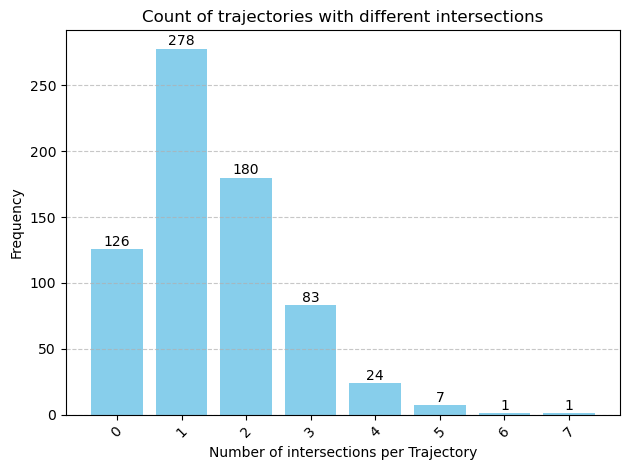

In [351]:
# overview distribution
import pandas as pd

# Load the DataFrame from CSV
df = pd.read_csv('df_nosmall_seg.csv')

# Group by trajectory ID and count unique segment names
# trajectory_count_per_segment_count = df.groupby('trajectory_Id')['segment_name'].nunique().value_counts()
# print(trajectory_count_per_segment_count)

num_intersections = (df.groupby('trajectory_Id')['segment_name'].nunique()-1).value_counts()

print(num_intersections)

# Plot the result
plt.bar(num_intersections.index, num_intersections.values, color='skyblue')

# Add specific numbers on top of each bar
for i, v in zip(num_intersections.index, num_intersections.values):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.xlabel('Number of intersections per Trajectory')
plt.ylabel('Frequency')
plt.title('Count of trajectories with different intersections')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [202]:
# analysis total check number for the 1 intersection
import pandas as pd

# Load the dataset
df = pd.read_csv("df_1inter.csv")
# df = df[(df["trajectory_Id"] == 1) | (df["trajectory_Id"] == 10)]

# Group the data by 'trajectory_Id'
grouped = df.groupby('trajectory_Id')

# Initialize counters for first and second segments
first_segment_count = 0
second_segment_count = 0
third_segment_count = 0

# Iterate over each group
for trajectory_id, trajectory_data in grouped:
    # Get the first segment
    # first_segment = trajectory_data.iloc[0]
    first_segment_name = trajectory_data['segment_name'].iloc[0]
    first_segment = trajectory_data[trajectory_data['segment_name'] == first_segment_name]
    # print(first_segment_name)

    # Check if 'mapLog:isScreenLocked+False' is in the 'mapInteractions' column of the first segment
    if first_segment['mapInteractions'].isin(['mapLog:isScreenLocked+False']).any():
        first_segment_count += 1
    # if 'mapLog:isScreenLocked+False' in first_segment['mapInteractions'].values:
    #     first_segment_count += first_segment['mapInteractions'].value_counts()['mapLog:isScreenLocked+False']

    
    
    second_segment_name = trajectory_data['segment_name'].iloc[ 1 + len(first_segment)]
    # print(second_segment_name)

    second_segment = trajectory_data[trajectory_data['segment_name'] == second_segment_name]
        # Check if 'mapLog:isScreenLocked+False' is in the 'mapInteractions' column of the second segment
    if second_segment['mapInteractions'].isin(['mapLog:isScreenLocked+False']).any():
        second_segment_count += 1
    # if 'mapLog:isScreenLocked+False' in second_segment['mapInteractions'].values:
    #     second_segment_count += second_segment['mapInteractions'].value_counts()['mapLog:isScreenLocked+False']
    # try:

    #     third_segment_name = trajectory_data['segment_name'].iloc[ 1 + len(first_segment)+ len(second_segment)]
    #     # print(second_segment_name)

    #     third_segment = trajectory_data[trajectory_data['segment_name'] == third_segment_name]
    #         # Check if 'mapLog:isScreenLocked+False' is in the 'mapInteractions' column of the second segment
    #     if third_segment['mapInteractions'].isin(['mapLog:isScreenLocked+False']).any():
    #         third_segment_count += 1
    #     # if 'mapLog:isScreenLocked+False' in second_segment['mapInteractions'].values:
    #     #     second_segment_count += second_segment['mapInteractions'].value_counts()['mapLog:isScreenLocked+False']

    # except IndexError:
    #         print("IndexError occurred. Unable to access segment name. Trajectory ID:", trajectory_id)




# Output the results
print("Number of trajectories with 'mapLog:isScreenLocked+False' in the first segment:", first_segment_count)
print("Number of trajectories with 'mapLog:isScreenLocked+False' in the second segment:", second_segment_count)
print("Number of trajectories with 'mapLog:isScreenLocked+False' in the third segment:", third_segment_count)



Number of trajectories with 'mapLog:isScreenLocked+False' in the first segment: 167
Number of trajectories with 'mapLog:isScreenLocked+False' in the second segment: 118
Number of trajectories with 'mapLog:isScreenLocked+False' in the third segment: 0


In [256]:
# add distance threshold
import pandas as pd
from shapely.geometry import Point

# Load the dataset
df = pd.read_csv("df_1inter.csv")
# df = df[(df["trajectory_Id"] == 1) | (df["trajectory_Id"] == 10)]

# Group the data by 'trajectory_Id'
grouped = df.groupby('trajectory_Id')

# Function to calculate distance between two points
def calculate_distance(point1, point2):
    return point1.distance(point2)

# Initialize counters for first and second segments
first_segment_count = 0
second_segment_count = 0

# Iterate over each group
for trajectory_id, trajectory_data in grouped:
    # Get the first segment
    # first_segment = trajectory_data.iloc[0]
    first_segment_name = trajectory_data['segment_name'].iloc[0]
    first_segment = trajectory_data[trajectory_data['segment_name'] == first_segment_name]
    # print(first_segment_name)

    # Check if 'mapLog:isScreenLocked+False' is in the 'mapInteractions' column of the first segment
    if first_segment['mapInteractions'].isin(['mapLog:isScreenLocked+False']).any():
        # Find the last point in the segment
        last_point = first_segment.iloc[-1][['posX', 'posZ']]
        
        # Find the point where 'mapInteractions' is 'mapLog:isScreenLocked+False'
        screen_locked_point = first_segment[first_segment['mapInteractions'] == 'mapLog:isScreenLocked+False'].iloc[0][['posX', 'posZ']]
        
        # Calculate the distance between the last point and the screen-locked point
        distance = calculate_distance(Point(last_point['posX'], last_point['posZ']), Point(screen_locked_point['posX'], screen_locked_point['posZ']))
        
        # Increment the count only if the distance is less than 10
        if distance <40:
            first_segment_count += 1
    
    
    second_segment_name = trajectory_data['segment_name'].iloc[ 1 + len(first_segment)]
    # print(second_segment_name)

    second_segment = trajectory_data[trajectory_data['segment_name'] == second_segment_name]
        # Check if 'mapLog:isScreenLocked+False' is in the 'mapInteractions' column of the second segment

    if second_segment['mapInteractions'].isin(['mapLog:isScreenLocked+False']).any():
        # Find the last point in the segment
        first_point = second_segment.iloc[0][['posX', 'posZ']]
        
        # Find the point where 'mapInteractions' is 'mapLog:isScreenLocked+False'
        screen_locked_point = second_segment[second_segment['mapInteractions'] == 'mapLog:isScreenLocked+False'].iloc[0][['posX', 'posZ']]
        
        # Calculate the distance between the last point and the screen-locked point
        distance = calculate_distance(Point(first_point['posX'], first_point['posZ']), Point(screen_locked_point['posX'], screen_locked_point['posZ']))
        
        # Increment the count only if the distance is less than 10
        if distance < 40:
            second_segment_count += 1
    

# Output the results
print("Number of trajectories with 'mapLog:isScreenLocked+False' in the first segment before intersection:", first_segment_count)
print("Number of trajectories with 'mapLog:isScreenLocked+False' in the second segment after intersection", second_segment_count)


Number of trajectories with 'mapLog:isScreenLocked+False' in the first segment before intersection: 66
Number of trajectories with 'mapLog:isScreenLocked+False' in the second segment after intersection 109


In [162]:
# copy
# add distance threshold
import pandas as pd
from shapely.geometry import Point

# Load the dataset
df = pd.read_csv("df_2inter.csv")
# df = df[(df["trajectory_Id"] == 1) | (df["trajectory_Id"] == 10)]

# Group the data by 'trajectory_Id'
grouped = df.groupby('trajectory_Id')

# Function to calculate distance between two points
def calculate_distance(point1, point2):
    return point1.distance(point2)

# Initialize counters for first and second segments
first_segment_count = 0
second_segment_count = 0

# Iterate over each group
for trajectory_id, trajectory_data in grouped:
    # Get the first segment
    # first_segment = trajectory_data.iloc[0]
    first_segment_name = trajectory_data['segment_name'].iloc[0]
    first_segment = trajectory_data[trajectory_data['segment_name'] == first_segment_name]
    # print(first_segment_name)

    # Check if 'mapLog:isScreenLocked+False' is in the 'mapInteractions' column of the first segment
    if first_segment['mapInteractions'].isin(['mapLog:isScreenLocked+False']).any():
        # Find the last point in the segment
        last_point = first_segment.iloc[-1][['posX', 'posZ']]
        
        # Find the point where 'mapInteractions' is 'mapLog:isScreenLocked+False'
        screen_locked_point = first_segment[first_segment['mapInteractions'] == 'mapLog:isScreenLocked+False'].iloc[0][['posX', 'posZ']]
        
        # Calculate the distance between the last point and the screen-locked point
        distance = calculate_distance(Point(last_point['posX'], last_point['posZ']), Point(screen_locked_point['posX'], screen_locked_point['posZ']))
        
        # Increment the count only if the distance is less than 10
        if distance <40:
            first_segment_count += 1
    
    
    second_segment_name = trajectory_data['segment_name'].iloc[ 1 + len(first_segment)]
    # print(second_segment_name)

    second_segment = trajectory_data[trajectory_data['segment_name'] == second_segment_name]
        # Check if 'mapLog:isScreenLocked+False' is in the 'mapInteractions' column of the second segment

    if second_segment['mapInteractions'].isin(['mapLog:isScreenLocked+False']).any():
        # Find the last point in the segment
        last_point = second_segment.iloc[-1][['posX', 'posZ']]
        
        # Find the point where 'mapInteractions' is 'mapLog:isScreenLocked+False'
        screen_locked_point = second_segment[second_segment['mapInteractions'] == 'mapLog:isScreenLocked+False'].iloc[0][['posX', 'posZ']]
        
        # Calculate the distance between the last point and the screen-locked point
        distance = calculate_distance(Point(last_point['posX'], last_point['posZ']), Point(screen_locked_point['posX'], screen_locked_point['posZ']))
        
        # Increment the count only if the distance is less than 10
        if distance < 40:
            second_segment_count += 1
    

# Output the results
print("Number of trajectories with 'mapLog:isScreenLocked+False' in the first segment:", first_segment_count)
print("Number of trajectories with 'mapLog:isScreenLocked+False' in the second segment:", second_segment_count)


Number of trajectories with 'mapLog:isScreenLocked+False' in the first segment: 44
Number of trajectories with 'mapLog:isScreenLocked+False' in the second segment: 52


In [253]:
# for 2inter
import pandas as pd
from shapely.geometry import Point

# Load the dataset
df = pd.read_csv("df_3inter.csv")
# df = df[(df["trajectory_Id"] == 3)]
# df = df[(df["trajectory_Id"] == 3) | (df["trajectory_Id"] == 4)]
# # Group the data by 'trajectory_Id'
grouped = df.groupby('trajectory_Id')

# Function to calculate distance between two points
def calculate_distance(point1, point2):
    return point1.distance(point2)

# Initialize counters for first and second segments
first_segment_before = 0
second_segment_before = 0
second_segment_after = 0
third_before = 0
third_after = 0

# Iterate over each group
for trajectory_id, trajectory_data in grouped:
    # Get the first segment
    # first_segment = trajectory_data.iloc[0]
    first_segment_name = trajectory_data['segment_name'].iloc[0]
    first_segment = trajectory_data[trajectory_data['segment_name'] == first_segment_name]
    # print(first_segment_name)

    # Check if 'mapLog:isScreenLocked+False' is in the 'mapInteractions' column of the first segment
    if first_segment['mapInteractions'].isin(['mapLog:isScreenLocked+False']).any():
        # Find the last point in the segment
        last_point = first_segment.iloc[-1][['posX', 'posZ']]
        
        # Find the point where 'mapInteractions' is 'mapLog:isScreenLocked+False'
        screen_locked_point = first_segment[first_segment['mapInteractions'] == 'mapLog:isScreenLocked+False'].iloc[0][['posX', 'posZ']]
        
        # Calculate the distance between the last point and the screen-locked point
        distance = calculate_distance(Point(last_point['posX'], last_point['posZ']), Point(screen_locked_point['posX'], screen_locked_point['posZ']))
        
        # Increment the count only if the distance is less than 10
        if distance <40:
            first_segment_before += 1
        
    
    
    second_segment_name = trajectory_data['segment_name'].iloc[ 1 + len(first_segment)]
    # print(second_segment_name)


    second_segment = trajectory_data[trajectory_data['segment_name'] == second_segment_name]
        # Check if 'mapLog:isScreenLocked+False' is in the 'mapInteractions' column of the second segment

    if second_segment['mapInteractions'].isin(['mapLog:isScreenLocked+False']).any():
        # Find the last point in the segment
        last_point = second_segment.iloc[-1][['posX', 'posZ']]
        
        # Find the point where 'mapInteractions' is 'mapLog:isScreenLocked+False'
        screen_locked_point = second_segment[second_segment['mapInteractions'] == 'mapLog:isScreenLocked+False'].iloc[0][['posX', 'posZ']]
        
        # Calculate the distance between the last point and the screen-locked point
        distance = calculate_distance(Point(last_point['posX'], last_point['posZ']), Point(screen_locked_point['posX'], screen_locked_point['posZ']))
        
        # Increment the count only if the distance is less than 10
        if distance < 40:
            second_segment_before += 1


        # Find the last point in the segment
        first_point = second_segment.iloc[0][['posX', 'posZ']]
        
        # Find the point where 'mapInteractions' is 'mapLog:isScreenLocked+False'
        screen_locked_point = second_segment[second_segment['mapInteractions'] == 'mapLog:isScreenLocked+False'].iloc[0][['posX', 'posZ']]
        
        # Calculate the distance between the last point and the screen-locked point
        distance = calculate_distance(Point(first_point['posX'], first_point['posZ']), Point(screen_locked_point['posX'], screen_locked_point['posZ']))
        
        # Increment the count only if the distance is less than 10
        if distance < 40:
            second_segment_after += 1


            
    try:
            third_segment_name = trajectory_data['segment_name'].iloc[1 + len(first_segment) + len(second_segment)]
            third_segment = trajectory_data[trajectory_data['segment_name'] == third_segment_name]

            
            # Check if 'mapLog:isScreenLocked+False' is in the 'mapInteractions' column of the third segment
            if third_segment['mapInteractions'].isin(['mapLog:isScreenLocked+False']).any():

                first_point = third_segment.iloc[0][['posX', 'posZ']]
        
                # Find the point where 'mapInteractions' is 'mapLog:isScreenLocked+False'
                third_locked_point = third_segment[third_segment['mapInteractions'] == 'mapLog:isScreenLocked+False'].iloc[0][['posX', 'posZ']]
                
                # Calculate the distance between the last point and the screen-locked point
                distance = calculate_distance(Point(first_point['posX'], first_point['posZ']), Point(screen_locked_point['posX'], screen_locked_point['posZ']))
                
                # Increment the count only if the distance is less than 10
                if distance < 40:
                    third_after += 1
                
                last_point = third_segment.iloc[-1][['posX', 'posZ']]
        
                # Find the point where 'mapInteractions' is 'mapLog:isScreenLocked+False'
                third_locked_point = third_segment[third_segment['mapInteractions'] == 'mapLog:isScreenLocked+False'].iloc[0][['posX', 'posZ']]
                
                # Calculate the distance between the last point and the screen-locked point
                distance = calculate_distance(Point(last_point['posX'], last_point['posZ']), Point(screen_locked_point['posX'], screen_locked_point['posZ']))
                
                # Increment the count only if the distance is less than 10
                if distance < 40:
                    third_before += 1
                
    except IndexError:
            print("IndexError occurred. Unable to access segment name. Trajectory ID:", trajectory_id)



    

# Output the results
print("before_1", first_segment_before)
print("after_1", second_segment_after)

print("before_2", second_segment_before)
print("after_2", third_after)

print("before_3", third_before)



before_1 25
after_1 54
before_2 33
after_2 10
before_3 0


In [275]:
# for 2inter renew 
import pandas as pd
from shapely.geometry import Point

# Load the dataset
df = pd.read_csv("df_2inter.csv")
# df = df[(df["trajectory_Id"] == 3)]
# df = df[(df["trajectory_Id"] == 3) | (df["trajectory_Id"] == 4)]
# # Group the data by 'trajectory_Id'
grouped = df.groupby('trajectory_Id')

# Function to calculate distance between two points
def calculate_distance(point1, point2):
    return point1.distance(point2)

# Initialize counters for first and second segments
first_segment_before = 0
second_segment_before = 0
second_segment_after = 0
third_before = 0
third_after = 0
fourth_1 = 0

# Iterate over each group
for trajectory_id, trajectory_data in grouped:
    # Get the first segment
    # first_segment = trajectory_data.iloc[0]

#------------------------first    
    first_segment_name = trajectory_data['segment_name'].iloc[0]
    first_segment = trajectory_data[trajectory_data['segment_name'] == first_segment_name]
    # print(first_segment_name)

    # Check if 'mapLog:isScreenLocked+False' is in the 'mapInteractions' column of the first segment
    if first_segment['mapInteractions'].isin(['mapLog:isScreenLocked+False']).any():
        # Find the last point in the segment
        last_point = first_segment.iloc[-1][['posX', 'posZ']]
        
        ## Find all points where 'mapInteractions' is 'mapLog:isScreenLocked+False'
        screen_locked_points = first_segment[first_segment['mapInteractions'] == 'mapLog:isScreenLocked+False'][['posX', 'posZ']]
        
        # Initialize a flag to keep track if a valid point has been counted
        counted = False
        
        # Calculate the distance between the last point and each screen-locked point
        for _, screen_locked_point in screen_locked_points.iterrows():
            distance = calculate_distance(Point(last_point['posX'], last_point['posZ']), Point(screen_locked_point['posX'], screen_locked_point['posZ']))
            
            # Increment the count only if the distance is less than 40 and a valid point has not been counted yet
            if distance < 40 and not counted:
                first_segment_before += 1
                counted = True  # Set the flag to True once a valid point is counted
        
    
#------------------------second
    second_segment_name = trajectory_data['segment_name'].iloc[ 1 + len(first_segment)]
    second_segment = trajectory_data[trajectory_data['segment_name'] == second_segment_name]


    if second_segment['mapInteractions'].isin(['mapLog:isScreenLocked+False']).any():
        #Find the last point in the segment
        last_point = second_segment.iloc[-1][['posX', 'posZ']]
        
        # Find the point where 'mapInteractions' is 'mapLog:isScreenLocked+False'
        screen_locked_points = second_segment[second_segment['mapInteractions'] == 'mapLog:isScreenLocked+False'][['posX', 'posZ']]

        counted = False
        # Calculate the distance between the last point and each screen-locked point
        for _, screen_locked_point in screen_locked_points.iterrows():
            distance = calculate_distance(Point(last_point['posX'], last_point['posZ']), Point(screen_locked_point['posX'], screen_locked_point['posZ']))
            
            # Increment the count only if the distance is less than 40 and a valid point has not been counted yet
            if distance < 40 and not counted:
                second_segment_before += 1
                counted = True  # Set the flag to True once a valid point is counted

        #__________________________________after
        # Find the last point in the segment
        first_point = second_segment.iloc[0][['posX', 'posZ']]
        
        # Find the point where 'mapInteractions' is 'mapLog:isScreenLocked+False'
        screen_locked_points = second_segment[second_segment['mapInteractions'] == 'mapLog:isScreenLocked+False'][['posX', 'posZ']]
        counted = False
        # Calculate the distance between the last point and the screen-locked point
        for _, screen_locked_point in screen_locked_points.iterrows():
            distance = calculate_distance(Point(first_point['posX'], first_point['posZ']), Point(screen_locked_point['posX'], screen_locked_point['posZ']))
            
            # Increment the count only if the distance is less than 40 and a valid point has not been counted yet
            if distance < 40 and not counted:
                second_segment_after += 1
                counted = True  # Set the flag to True once a valid point is counted


#------------------------third        
        try:
            third_segment_name = trajectory_data['segment_name'].iloc[1 + len(first_segment) + len(second_segment)]
            third_segment = trajectory_data[trajectory_data['segment_name'] == third_segment_name]

            
            # Check if 'mapLog:isScreenLocked+False' is in the 'mapInteractions' column of the third segment
            if third_segment['mapInteractions'].isin(['mapLog:isScreenLocked+False']).any():

                first_point = third_segment.iloc[0][['posX', 'posZ']]
        
                # Find the point where 'mapInteractions' is 'mapLog:isScreenLocked+False'
                screen_locked_points = third_segment[third_segment['mapInteractions'] == 'mapLog:isScreenLocked+False'][['posX', 'posZ']]
                
                counted = False
                # Calculate the distance between the last point and the screen-locked point
                for _, screen_locked_point in screen_locked_points.iterrows():
                    distance = calculate_distance(Point(first_point['posX'], first_point['posZ']), Point(screen_locked_point['posX'], screen_locked_point['posZ']))
                    
                    # Increment the count only if the distance is less than 40 and a valid point has not been counted yet
                    if distance < 40 and not counted:
                        third_after += 1
                        counted = True  # Set the flag to True once a valid point is counted
                
                #___________________________
                last_point = third_segment.iloc[-1][['posX', 'posZ']]
        
                # Find the point where 'mapInteractions' is 'mapLog:isScreenLocked+False'
                screen_locked_points = third_segment[third_segment['mapInteractions'] == 'mapLog:isScreenLocked+False'][['posX', 'posZ']]
                
                counted = False
                # Calculate the distance between the last point and the screen-locked point
                for _, screen_locked_point in screen_locked_points.iterrows():
                    distance = calculate_distance(Point(last_point['posX'], last_point['posZ']), Point(screen_locked_point['posX'], screen_locked_point['posZ']))
                    
                    # Increment the count only if the distance is less than 40 and a valid point has not been counted yet
                    if distance < 40 and not counted:
                        third_before += 1
                        counted = True  # Set the flag to True once a valid point is counted
                
        except IndexError:
                print("IndexError occurred. Unable to access segment name. Trajectory ID:", trajectory_id)


#------------------------fourth  
    try:

        fourth_segment_name = trajectory_data['segment_name'].iloc[1 + len(first_segment) + len(second_segment) + len(third_segment)]
        fourth_segment = trajectory_data[trajectory_data['segment_name'] == fourth_segment_name]

        if fourth_segment['mapInteractions'].isin(['mapLog:isScreenLocked+False']).any():
            #Find the last point in the segment
            first_point = fourth_segment.iloc[0][['posX', 'posZ']]
            
            # Find the point where 'mapInteractions' is 'mapLog:isScreenLocked+False'
            screen_locked_points = fourth_segment[fourth_segment['mapInteractions'] == 'mapLog:isScreenLocked+False'][['posX', 'posZ']]

            counted = False
            # Calculate the distance between the last point and each screen-locked point
            for _, screen_locked_point in screen_locked_points.iterrows():
                distance = calculate_distance(Point(first_point['posX'], first_point['posZ']), Point(screen_locked_point['posX'], screen_locked_point['posZ']))
                
                # Increment the count only if the distance is less than 40 and a valid point has not been counted yet
                if distance < 40 and not counted:
                    fourth_1 += 1
                    counted = True  # Set the flag to True once a valid point is counted
    except IndexError:
                    print("IndexError occurred. Unable to access segment name. Trajectory ID:", trajectory_id)



    

# Output the results
print("before_1", first_segment_before)

print("after_1", second_segment_after)
print("before_2", second_segment_before)
print("after_2", third_after)

print("before_3", third_before)
print('after_3', fourth_1)


IndexError occurred. Unable to access segment name. Trajectory ID: 3
IndexError occurred. Unable to access segment name. Trajectory ID: 4
IndexError occurred. Unable to access segment name. Trajectory ID: 7
IndexError occurred. Unable to access segment name. Trajectory ID: 9
IndexError occurred. Unable to access segment name. Trajectory ID: 15
IndexError occurred. Unable to access segment name. Trajectory ID: 16
IndexError occurred. Unable to access segment name. Trajectory ID: 17
IndexError occurred. Unable to access segment name. Trajectory ID: 18
IndexError occurred. Unable to access segment name. Trajectory ID: 25
IndexError occurred. Unable to access segment name. Trajectory ID: 31
IndexError occurred. Unable to access segment name. Trajectory ID: 34
IndexError occurred. Unable to access segment name. Trajectory ID: 42
IndexError occurred. Unable to access segment name. Trajectory ID: 47
IndexError occurred. Unable to access segment name. Trajectory ID: 48
IndexError occurred. Una

In [ ]:
# for 3 inter
# 3 segment
import pandas as pd
from shapely.geometry import Point

# Load the dataset
df = pd.read_csv("df_2inter.csv")
# df = df[(df["trajectory_Id"] == 3)]
# df = df[(df["trajectory_Id"] == 3) | (df["trajectory_Id"] == 4)]
# # Group the data by 'trajectory_Id'
grouped = df.groupby('trajectory_Id')

# Function to calculate distance between two points
def calculate_distance(point1, point2):
    return point1.distance(point2)

# Initialize counters for first and second segments
first_segment_count = 0
second_segment_count = 0
third_segment_count = 0

# Iterate over each group
for trajectory_id, trajectory_data in grouped:
    # Get the first segment
    # first_segment = trajectory_data.iloc[0]
    first_segment_name = trajectory_data['segment_name'].iloc[0]
    first_segment = trajectory_data[trajectory_data['segment_name'] == first_segment_name]
    # print(first_segment_name)

    # Check if 'mapLog:isScreenLocked+False' is in the 'mapInteractions' column of the first segment
    if first_segment['mapInteractions'].isin(['mapLog:isScreenLocked+False']).any():
        # Find the last point in the segment
        last_point = first_segment.iloc[-1][['posX', 'posZ']]
        
        # Find the point where 'mapInteractions' is 'mapLog:isScreenLocked+False'
        screen_locked_point = first_segment[first_segment['mapInteractions'] == 'mapLog:isScreenLocked+False'].iloc[0][['posX', 'posZ']]
        
        # Calculate the distance between the last point and the screen-locked point
        distance = calculate_distance(Point(last_point['posX'], last_point['posZ']), Point(screen_locked_point['posX'], screen_locked_point['posZ']))
        
        # Increment the count only if the distance is less than 10
        if distance <40:
            first_segment_count += 1
    
    
    second_segment_name = trajectory_data['segment_name'].iloc[ 1 + len(first_segment)]
    # print(second_segment_name)


    second_segment = trajectory_data[trajectory_data['segment_name'] == second_segment_name]
        # Check if 'mapLog:isScreenLocked+False' is in the 'mapInteractions' column of the second segment

    if second_segment['mapInteractions'].isin(['mapLog:isScreenLocked+False']).any():
        # Find the last point in the segment
        last_point = second_segment.iloc[-1][['posX', 'posZ']]
        
        # Find the point where 'mapInteractions' is 'mapLog:isScreenLocked+False'
        screen_locked_point = second_segment[second_segment['mapInteractions'] == 'mapLog:isScreenLocked+False'].iloc[0][['posX', 'posZ']]
        
        # Calculate the distance between the last point and the screen-locked point
        distance = calculate_distance(Point(last_point['posX'], last_point['posZ']), Point(screen_locked_point['posX'], screen_locked_point['posZ']))
        
        # Increment the count only if the distance is less than 10
        if distance < 40:
            second_segment_count += 1


            
    try:
            third_segment_name = trajectory_data['segment_name'].iloc[1 + len(first_segment) + len(second_segment)]
            third_segment = trajectory_data[trajectory_data['segment_name'] == third_segment_name]

            
            # Check if 'mapLog:isScreenLocked+False' is in the 'mapInteractions' column of the third segment
            if third_segment['mapInteractions'].isin(['mapLog:isScreenLocked+False']).any():

                first_point = third_segment.iloc[0][['posX', 'posZ']]
        
                # Find the point where 'mapInteractions' is 'mapLog:isScreenLocked+False'
                third_locked_point = third_segment[third_segment['mapInteractions'] == 'mapLog:isScreenLocked+False'].iloc[0][['posX', 'posZ']]
                
                # Calculate the distance between the last point and the screen-locked point
                distance = calculate_distance(Point(first_point['posX'], first_point['posZ']), Point(screen_locked_point['posX'], screen_locked_point['posZ']))
                
                # Increment the count only if the distance is less than 10
                if distance < 40:
                    third_segment_count += 1

    except IndexError:
            print("IndexError occurred. Unable to access segment name. Trajectory ID:", trajectory_id)
    
    fourth_segment_name = trajectory_data['segment_name'].iloc[1 + len(first_segment) + len(second_segment) + len(third_segment)]
    fourth_segment = trajectory_data[trajectory_data['segment_name'] == fourth_segment_name]
    # print(first_segment_name)

    # Check if 'mapLog:isScreenLocked+False' is in the 'mapInteractions' column of the first segment
    if fourth_segment['mapInteractions'].isin(['mapLog:isScreenLocked+False']).any():
        # Find the last point in the segment
        last_point = fourth_segment.iloc[-1][['posX', 'posZ']]
        
        # Find the point where 'mapInteractions' is 'mapLog:isScreenLocked+False'
        screen_locked_point = first_segment[first_segment['mapInteractions'] == 'mapLog:isScreenLocked+False'].iloc[0][['posX', 'posZ']]
        
        # Calculate the distance between the last point and the screen-locked point
        distance = calculate_distance(Point(last_point['posX'], last_point['posZ']), Point(screen_locked_point['posX'], screen_locked_point['posZ']))
        
        # Increment the count only if the distance is less than 10
        if distance <40:
            first_segment_count += 1



    

# Output the results
print("Number of trajectories with 'mapLog:isScreenLocked+False' in the first segment:", first_segment_count)
print("Number of trajectories with 'mapLog:isScreenLocked+False' in the second segment:", second_segment_count)
print("Number of trajectories with 'mapLog:isScreenLocked+False' in the third segment: after", third_segment_count)



   -------------------- Analysis for the distance from start point


In [205]:
import pandas as pd 
df = pd.read_csv('df_0inter.csv')
import pandas as pd
import numpy as np

# Assuming your dataframe is named df

# Filter dataframe to get only rows where mapInteractions is 'mapLog:isScreenLocked+False'
filtered_df = df[df['mapInteractions'] == 'mapLog:isScreenLocked+False']

# Group by trajectory_Id
grouped = filtered_df.groupby('trajectory_Id')

# Initialize an empty dataframe to store results
results_df = pd.DataFrame(columns=['trajectory_Id', 'distance_to_start'])

# Iterate over groups
for name, group in grouped:
    # Find the first point of the trajectory
    first_point = df[(df['trajectory_Id'] == name)].iloc[0]
    
    # Calculate the distance from each filtered point to the first point
    for index, filtered_point in group.iterrows():
        distance = np.sqrt((filtered_point['posX'] - first_point['posX'])**2 + (filtered_point['posZ'] - first_point['posZ'])**2)
        
        # Append the results to the final dataframe
        results_df = results_df.append({'trajectory_Id': name, 'distance_to_start': distance}, ignore_index=True)

# Display the results
print(results_df)



     trajectory_Id  distance_to_start
0             29.0             2.6200
1             29.0            93.0085
2             29.0           105.0075
3             29.0           135.8405
4             43.0             6.3057
..             ...                ...
107          844.0           140.1375
108          844.0           170.4095
109          854.0            26.7335
110          854.0            43.1679
111          854.0            52.5103

[112 rows x 2 columns]


C:\Users\xuzhengfang\AppData\Local\Temp\ipykernel_15648\2991431887.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'trajectory_Id': name, 'distance_to_start': distance}, ignore_index=True)
C:\Users\xuzhengfang\AppData\Local\Temp\ipykernel_15648\2991431887.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'trajectory_Id': name, 'distance_to_start': distance}, ignore_index=True)
C:\Users\xuzhengfang\AppData\Local\Temp\ipykernel_15648\2991431887.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'trajectory_Id': name, 'distance_to_start': distance}, ignore_index=True)
C:\Users\xuzhengfang\AppData\Local\Temp\ipykernel_15648

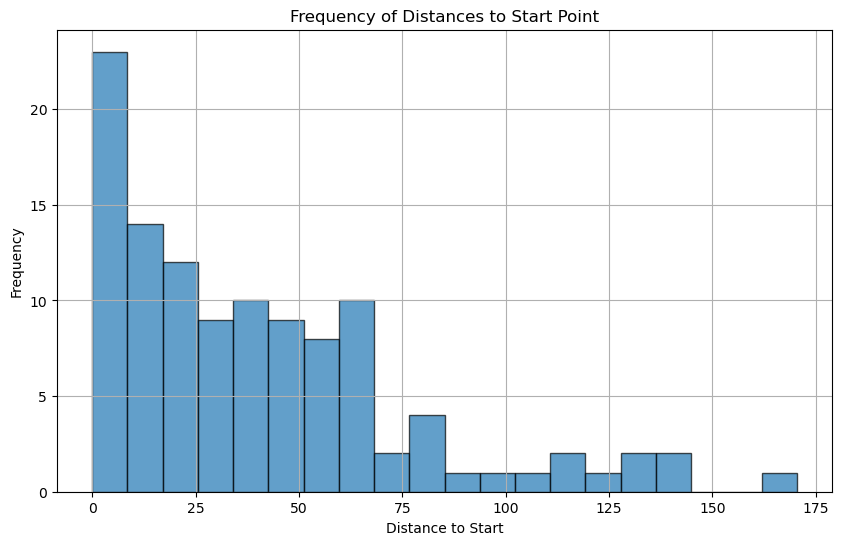

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming your dataframe is named results_df

# Plotting
plt.figure(figsize=(10, 6))

# Plot histogram of distances
plt.hist(results_df['distance_to_start'], bins=20, edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Distance to Start')
plt.ylabel('Frequency')
plt.title('Frequency of Distances to Start Point')

# Show plot
plt.grid(True)
plt.show()


In [343]:
# Create intervals of 10
intervals = np.arange(0, results_df['distance_to_start'].max() + 10, 10)

# Count the number of points falling into each interval
counts, bins = np.histogram(results_df['distance_to_start'], bins=intervals)

# Create a new DataFrame for storing intervals and counts
interval_data = pd.DataFrame({
    'Interval': [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(counts))],
    'Frequency': counts
})

# Display the new dataset
print(interval_data)





   Interval  Frequency
0      0-10         81
1     10-20         43
2     20-30         36
3     30-40         48
4     40-50         34
5     50-60         43
6     60-70         33
7     70-80         35
8     80-90         29
9    90-100         19
10  100-110         52
11  110-120         16
12  120-130         11
13  130-140          7
14  140-150          7
15  150-160          4
16  160-170          1
17  170-180          3
18  180-190          1
19  190-200          0
20  200-210          1


In [344]:
# Initialize an empty dataframe to store trajectory lengths
df = pd.read_csv('df_0inter.csv')
# Group the dataframe by trajectory_Id
grouped = df.groupby('trajectory_Id')

trajectory_lengths = pd.DataFrame(columns=['trajectory_Id', 'length'])

# Calculate length for each trajectory
for name, group in grouped:
    # Calculate distance between first and last point
    first_point = group.iloc[0]
    last_point = group.iloc[-1]
    distance = np.sqrt((last_point['posX'] - first_point['posX'])**2 + (last_point['posZ'] - first_point['posZ'])**2)
    
    # Store trajectory length in the dataframe
    trajectory_lengths = trajectory_lengths.append({'trajectory_Id': name, 'length': distance}, ignore_index=True)

# Display the trajectory lengths
# print(trajectory_lengths)

# Create intervals of bins of size 10
intervals = range(0, int(trajectory_lengths['length'].max()) + 10, 10)



# Count the number of trajectories falling into each interval
trajectory_counts = []
for i in range(len(intervals) - 1):
    lower_bound = intervals[i]
    count = len(trajectory_lengths[trajectory_lengths['length'] > lower_bound])
    trajectory_counts.append(count)

# Create a new dataframe for storing intervals and counts
interval_counts = pd.DataFrame({
    'Interval': [f"{intervals[i]}-{intervals[i+1]}" for i in range(len(intervals) - 1)],
    'Number of Trajectories': trajectory_counts
})

# Display the interval counts
print(interval_counts)  

   Interval  Number of Trajectories
0      0-10                     124
1     10-20                     108
2     20-30                     101
3     30-40                      94
4     40-50                      89
5     50-60                      81
6     60-70                      56
7     70-80                      22
8     80-90                      17
9    90-100                      14
10  100-110                       9
11  110-120                       7
12  120-130                       7
13  130-140                       7
14  140-150                       6
15  150-160                       6
16  160-170                       6
17  170-180                       6
18  180-190                       6
19  190-200                       2


C:\Users\xuzhengfang\AppData\Local\Temp\ipykernel_15648\718003068.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trajectory_lengths = trajectory_lengths.append({'trajectory_Id': name, 'length': distance}, ignore_index=True)
C:\Users\xuzhengfang\AppData\Local\Temp\ipykernel_15648\718003068.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trajectory_lengths = trajectory_lengths.append({'trajectory_Id': name, 'length': distance}, ignore_index=True)
C:\Users\xuzhengfang\AppData\Local\Temp\ipykernel_15648\718003068.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trajectory_lengths = trajectory_lengths.append({'trajectory_Id': name, 'length': distance}, ignore_index=True)
C:\Users\xuzhengfang\AppData\Local\Temp\ipy

   Interval  Number of Trajectories  Frequency   density
0      0-10                     124         81  0.653226
1     10-20                     108         43  0.398148
2     20-30                     101         36  0.356436
3     30-40                      94         48  0.510638
4     40-50                      89         34  0.382022
5     50-60                      81         43  0.530864
6     60-70                      56         33  0.589286
7     70-80                      22         35  1.590909
8     80-90                      17         29  1.705882
9    90-100                      14         19  1.357143
10  100-110                       9         52  5.777778
11  110-120                       7         16  2.285714
12  120-130                       7         11  1.571429
13  130-140                       7          7  1.000000
14  140-150                       6          7  1.166667
15  150-160                       6          4  0.666667
16  160-170                    

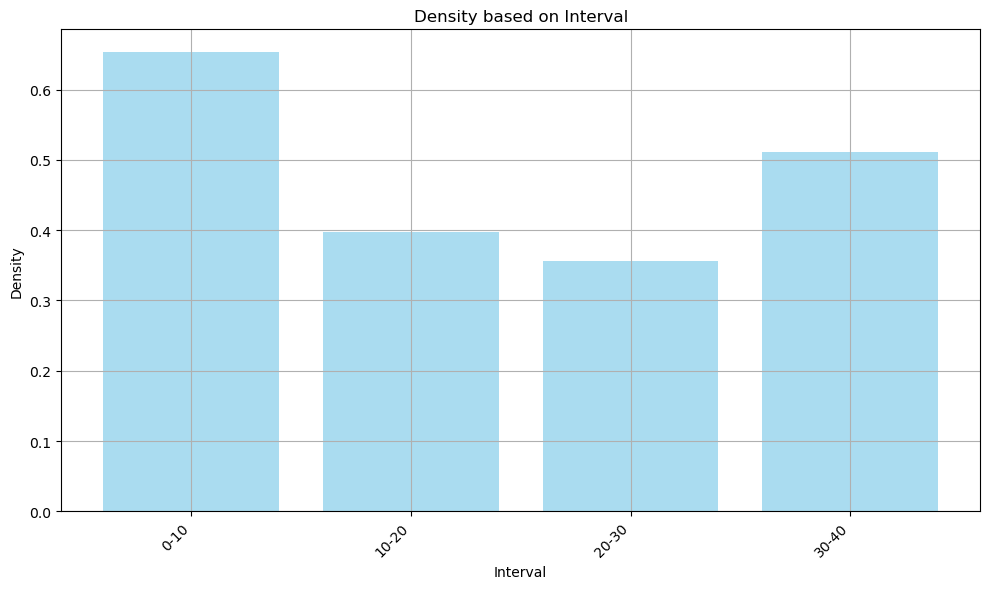

In [350]:
# Merge 

df_merged_0inter_seg1 = pd.merge(interval_counts, interval_data, on='Interval')
df_merged_0inter_seg1['density'] = df_merged_0inter_seg1['Frequency'] / df_merged_0inter_seg1['Number of Trajectories']
print(df_merged_0inter_seg1)


import pandas as pd
import matplotlib.pyplot as plt


first_4_rows = df_merged_0inter_seg1.head(4)
# Extracting interval boundaries for plotting
intervals = first_4_rows['Interval'].str.split('-', expand=True).astype(int)
interval_centers = (intervals[0] + intervals[1]) / 2

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(interval_centers, first_4_rows['density'], width=8, alpha=0.7, color='skyblue')

# Add labels and title
plt.xlabel('Interval')
plt.ylabel('Density')
plt.title('Density based on Interval')

# Show plot
plt.grid(True)
plt.xticks(interval_centers, first_4_rows['Interval'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [218]:
# extract the fisrt point from the df_2inter

df = pd.read_csv('df_1inter.csv')

# Define a custom filter function to keep only rows where segment_name is the first type
def keep_first_segment(group):
    first_segment_name = group['segment_name'].iloc[0]
    return group[group['segment_name'] == first_segment_name]

# Apply the filter function to each group (trajectory_Id)
first_segment_data = df.groupby('trajectory_Id').apply(keep_first_segment)

# Reset the index if needed
first_segment_data.reset_index(drop=True, inplace=True)
first_segment_data.to_csv('df_1inter_1seg.csv')



In [219]:
# Filter dataframe to get only rows where mapInteractions is 'mapLog:isScreenLocked+False'
filtered_df = df[df['mapInteractions'] == 'mapLog:isScreenLocked+False']

# Group by trajectory_Id
grouped = filtered_df.groupby('trajectory_Id')

# Initialize an empty dataframe to store results
results_df = pd.DataFrame(columns=['trajectory_Id', 'distance_to_start'])

# Iterate over groups
for name, group in grouped:
    # Find the first point of the trajectory
    first_point = df[(df['trajectory_Id'] == name)].iloc[0]
    
    # Calculate the distance from each filtered point to the first point
    for index, filtered_point in group.iterrows():
        distance = np.sqrt((filtered_point['posX'] - first_point['posX'])**2 + (filtered_point['posZ'] - first_point['posZ'])**2)
        
        # Append the results to the final dataframe
        results_df = results_df.append({'trajectory_Id': name, 'distance_to_start': distance}, ignore_index=True)

# Display the results
print(results_df)

C:\Users\xuzhengfang\AppData\Local\Temp\ipykernel_15648\2126017000.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'trajectory_Id': name, 'distance_to_start': distance}, ignore_index=True)
C:\Users\xuzhengfang\AppData\Local\Temp\ipykernel_15648\2126017000.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'trajectory_Id': name, 'distance_to_start': distance}, ignore_index=True)
C:\Users\xuzhengfang\AppData\Local\Temp\ipykernel_15648\2126017000.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'trajectory_Id': name, 'distance_to_start': distance}, ignore_index=True)
C:\Users\xuzhengfang\AppData\Local\Temp\ipykernel_15648

     trajectory_Id  distance_to_start
0              1.0           4.037300
1             10.0          70.108000
2             10.0         103.026188
3             13.0          13.280600
4             22.0          26.391600
..             ...                ...
499          861.0          66.799200
500          863.0           1.412600
501          863.0          29.053500
502          863.0          60.908800
503          863.0         100.779973

[504 rows x 2 columns]


C:\Users\xuzhengfang\AppData\Local\Temp\ipykernel_15648\2126017000.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'trajectory_Id': name, 'distance_to_start': distance}, ignore_index=True)
C:\Users\xuzhengfang\AppData\Local\Temp\ipykernel_15648\2126017000.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'trajectory_Id': name, 'distance_to_start': distance}, ignore_index=True)
C:\Users\xuzhengfang\AppData\Local\Temp\ipykernel_15648\2126017000.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'trajectory_Id': name, 'distance_to_start': distance}, ignore_index=True)
C:\Users\xuzhengfang\AppData\Local\Temp\ipykernel_15648

In [220]:
# Create intervals of 10
intervals = np.arange(0, results_df['distance_to_start'].max() + 10, 10)

# Count the number of points falling into each interval
counts, bins = np.histogram(results_df['distance_to_start'], bins=intervals)

# Create a new DataFrame for storing intervals and counts
interval_data = pd.DataFrame({
    'Interval': [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(counts))],
    'Frequency': counts
})

# Display the new dataset
print(interval_data)

   Interval  Frequency
0      0-10         81
1     10-20         43
2     20-30         36
3     30-40         48
4     40-50         34
5     50-60         43
6     60-70         33
7     70-80         35
8     80-90         29
9    90-100         19
10  100-110         52
11  110-120         16
12  120-130         11
13  130-140          7
14  140-150          7
15  150-160          4
16  160-170          1
17  170-180          3
18  180-190          1
19  190-200          0
20  200-210          1


In [222]:
# Initialize an empty dataframe to store trajectory lengths
df = pd.read_csv('df_1inter_1seg.csv')
# Group the dataframe by trajectory_Id
grouped = df.groupby('trajectory_Id')

trajectory_lengths = pd.DataFrame(columns=['trajectory_Id', 'length'])

# Calculate length for each trajectory
for name, group in grouped:
    # Calculate distance between first and last point
    first_point = group.iloc[0]
    last_point = group.iloc[-1]
    distance = np.sqrt((last_point['posX'] - first_point['posX'])**2 + (last_point['posZ'] - first_point['posZ'])**2)
    
    # Store trajectory length in the dataframe
    trajectory_lengths = trajectory_lengths.append({'trajectory_Id': name, 'length': distance}, ignore_index=True)

# Display the trajectory lengths
# print(trajectory_lengths)

# Create intervals of bins of size 10
intervals = range(0, int(trajectory_lengths['length'].max()) + 10, 10)



# Count the number of trajectories falling into each interval
trajectory_counts = []
for i in range(len(intervals) - 1):
    lower_bound = intervals[i]
    count = len(trajectory_lengths[trajectory_lengths['length'] > lower_bound])
    trajectory_counts.append(count)

# Create a new dataframe for storing intervals and counts
interval_counts = pd.DataFrame({
    'Interval': [f"{intervals[i]}-{intervals[i+1]}" for i in range(len(intervals) - 1)],
    'Number of Trajectories': trajectory_counts
})

# Display the interval counts
print(interval_counts)  

   Interval  Number of Trajectories
0      0-10                     276
1     10-20                     270
2     20-30                     235
3     30-40                     220
4     40-50                     181
5     50-60                     170
6     60-70                     140
7     70-80                     117
8     80-90                     100
9    90-100                      44
10  100-110                      25
11  110-120                      19
12  120-130                      17
13  130-140                      13
14  140-150                       9
15  150-160                       1


C:\Users\xuzhengfang\AppData\Local\Temp\ipykernel_15648\789779604.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trajectory_lengths = trajectory_lengths.append({'trajectory_Id': name, 'length': distance}, ignore_index=True)
C:\Users\xuzhengfang\AppData\Local\Temp\ipykernel_15648\789779604.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trajectory_lengths = trajectory_lengths.append({'trajectory_Id': name, 'length': distance}, ignore_index=True)
C:\Users\xuzhengfang\AppData\Local\Temp\ipykernel_15648\789779604.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trajectory_lengths = trajectory_lengths.append({'trajectory_Id': name, 'length': distance}, ignore_index=True)
C:\Users\xuzhengfang\AppData\Local\Temp\ipy

__________________________________

In [327]:
# # extract the fisrt two segments from the df_2inter

import pandas as pd

df = pd.read_csv('df_1inter.csv')
# df = df[df['trajectory_Id'] == 1]

# Define a custom filter function to keep only rows where segment_name is among the first three unique segment names
def keep_first_three_segments(group):
    unique_segments = group['segment_name'].unique()[0:1]
    return group[group['segment_name'].isin(unique_segments)]

# Apply the filter function to each group (trajectory_Id)
first_three_segments_data = df.groupby('trajectory_Id').apply(keep_first_three_segments)

# Reset the index if needed
first_three_segments_data.reset_index(drop=True, inplace=True)
first_three_segments_data.to_csv('df_3inter_3seg.csv')


In [341]:
# 3 intersection first two intersection
# Load the dataset
df = pd.read_csv("df_5inter.csv")

# Initialize variables to store total distance and the count of 'mapLog:isScreenLocked+False' points
total_distance = 0
num_map_interactions_false = 0

# Loop through each trajectory ID
for trajectory_Id, group in df.groupby('trajectory_Id'):
    # Group by segment_name for the current trajectory and compute the length of each segment
    segment_lengths = group.groupby('segment_name').apply(lambda x: np.sqrt((x['posX'].iloc[-1] - x['posX'].iloc[0])**2 + (x['posZ'].iloc[-1] - x['posZ'].iloc[0])**2))
    
    # Calculate the total distance for the current trajectory
    total_distance += segment_lengths.sum()
    
    # Count the number of points with 'mapLog:isScreenLocked+False' for the current trajectory
    num_map_interactions_false += group[group['mapInteractions'] == 'mapLog:isScreenLocked+False'].shape[0]

# Calculate the ratio of points with 'mapLog:isScreenLocked+False' to the total distance
ratio_map_interactions_false = num_map_interactions_false / total_distance

# Print the results
print("Total distance:", total_distance)
print("Number of points with 'mapLog:isScreenLocked+False':", num_map_interactions_false)
print("Ratio of points with 'mapLog:isScreenLocked+False' to the total distance:", ratio_map_interactions_false)

Total distance: 2306.64430960055
Number of points with 'mapLog:isScreenLocked+False': 60
Ratio of points with 'mapLog:isScreenLocked+False' to the total distance: 0.026011812809748035
